## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import imageio
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
import datetime as dt
from ydata_profiling import ProfileReport


### Setting Seaborn Style

In [12]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.labelcolor": text_color,

        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "font.family": font_family,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)
PROPS = {
    'boxprops':{'edgecolor':'white'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'white'},
    'capprops':{'color':'white'},
    'flierprops':{'marker':'o', 'markerfacecolor':'white'}
}

FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"
background_color="#253D5B"

set_seaborn_style(
    font_family="monospace",
    background_color="#253D5B",
    grid_color="#355882",
    text_color="#EEEEEE"
)
population_male = df_sui_merg[df_sui_merg['Gender']=='Male'].sort_values('Crude Rate',ascending=True)
population_female = df_sui_merg[df_sui_merg['Gender']=='Female'].sort_values('Crude Rate',ascending=True)

## Loading Prepaired WHR,WHR2021,Suicida Crude

In [2]:
df_WHR_2021 = pd.read_csv('2_Prepaired_Data/Prepaired_WHR_2021_2023-07-23-18-27-24.csv')
df_WHR = pd.read_csv('2_Prepaired_Data/Prepaired_WHR_2023-07-23-18-27-24.csv')
df_Suicidal = pd.read_csv('2_Prepaired_Data/Prepaired_Suicidal_2023-07-23-18-27-24.csv')

## Merging WHR,WHR2021

In [3]:
df_WHR_2021

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
139      Lesotho  Sub-Saharan Africa         3.512   
140     Botswana  Sub-Saharan Africa         3.467   
141       Rwanda  Sub-Saharan Africa         3.415   
142     Zimbabwe  Sub-Saharan Africa         3.145   
143  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
139                           0.120         3.748         3.276   
140                           0.074         3.611         3.322   
141                           0.068         3.548         3.282   
142                           0.058         3.259         3.030   
143                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
139                  7.926           0.787                   48.700   
140                  9.782           0.784                   59.269   
141                  7.676           0.552                   61.400   
142                  7.943           0.750                   56.201   
143                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
139                         0.715      -0.131                      0.915   
140                         0.824      -0.246                      0.801   
141                         0.897       0.061                      0.167   
142                         0.677      -0.047                      0.821   
143                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
139                      2.43                             0.451   
140                      2.43                             1.099   
141                      2.43                             0.364   
142                      2.43                             0.457   
143                      2.43                  

In [4]:
df_WHR_2021.rename(columns = {'Country name':'Country name',
                              'Regional indicator':'Regional indicator',
                             'Ladder score':'Life Ladder',
                             'Logged GDP per capita':'Log GDP per capita',
                             'Social support':'Social support',
                             'Healthy life expectancy':'Healthy life expectancy at birth',
                             'Freedom to make life choices':'Freedom to make life choices',
                             'Generosity':'Generosity',
                             'Ladder score in Dystopia':'Ladder score in Dystopia',
                             'Perceptions of corruption':'Perceptions of corruption'}, inplace = True)

In [5]:
df_merged = df_WHR.merge(df_WHR_2021['Regional indicator'],left_on=df_WHR['Country name'],right_on=df_WHR_2021['Country name']).drop('key_0', axis=1)

In [6]:
df_WHR.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
df_merged[df_merged['Country name']== 'Egypt']['year']

471    2005
472    2007
473    2008
474    2009
475    2010
476    2011
477    2012
478    2013
479    2014
480    2015
481    2016
482    2017
483    2018
484    2019
485    2020
Name: year, dtype: int64

In [8]:
for x in df_WHR_2021['Country name'].unique():
    
    df2 =pd.DataFrame({'Country name': x,
           'year': 2021,
           'Life Ladder': df_WHR_2021[df_WHR_2021['Country name']== x]['Life Ladder'],
           'Log GDP per capita':df_WHR_2021[df_WHR_2021['Country name']== x]['Log GDP per capita'],
           'Social support':df_WHR_2021[df_WHR_2021['Country name']== x]['Social support'],
           'Healthy life expectancy at birth':df_WHR_2021[df_WHR_2021['Country name']== x]['Healthy life expectancy at birth'],
           'Freedom to make life choices':df_WHR_2021[df_WHR_2021['Country name']== x]['Freedom to make life choices'],
           'Generosity':df_WHR_2021[df_WHR_2021['Country name']== x]['Generosity'],
           'Perceptions of corruption':df_WHR_2021[df_WHR_2021['Country name']== x]['Perceptions of corruption'],
           'Regional indicator': df_WHR_2021[df_WHR_2021['Country name']== x]['Regional indicator']
          })
    df_merged =pd.concat([df_merged,df2])


In [9]:
list(df_merged[df_merged['Country name']== 'Egypt']['year'])

[2005,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [10]:
df_merged.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  
0         South Asia  
1         South Asia  
2         South Asia  
3         South Asia  
4         South Asia

In [11]:
df_merged = df_merged.sort_values(['Country name','year'],ascending= True).reset_index().drop('index',axis=1)

In [12]:
df_merged.loc[df_merged['Country name'] == 'Afghanistan']

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008        3.724               7.370           0.451   
1   Afghanistan  2009        4.402               7.540           0.552   
2   Afghanistan  2010        4.758               7.647           0.539   
3   Afghanistan  2011        3.832               7.620           0.521   
4   Afghanistan  2012        3.783               7.705           0.521   
5   Afghanistan  2013        3.572               7.725           0.484   
6   Afghanistan  2014        3.131               7.718           0.526   
7   Afghanistan  2015        3.983               7.702           0.529   
8   Afghanistan  2016        4.220               7.697           0.559   
9   Afghanistan  2017        2.662               7.697           0.491   
10  Afghanistan  2018        2.694               7.692           0.508   
11  Afghanistan  2019        2.375               7.697           0.420   
12  Afghanistan  2021        2.523               7.695           0.463   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                             50.800                         0.718   
1                             51.200                         0.679   
2                             51.600                         0.600   
3                             51.920                         0.496   
4                             52.240                         0.531   
5                             52.560                         0.578   
6                             52.880                         0.509   
7                             53.200                         0.389   
8                             53.000                         0.523   
9                             52.800                         0.427   
10                            52.600                         0.374   
11                            52.400                         0.394   
12                            52.493                         0.382   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0        0.168                      0.882            0.518            0.258   
1        0.190                      0.850            0.584            0.237   
2        0.121                      0.707            0.618            0.275   
3        0.162                      0.731            0.611            0.267   
4        0.236                      0.776            0.710            0.268   
5        0.061                      0.823            0.621            0.273   
6        0.104                      0.871            0.532            0.375   
7        0.080                      0.881            0.554            0.339   
8        0.042                      0.793            0.565            0.348   
9       -0.121                      0.954            0.496            0.371   
10      -0.094                      0.928            0.424            0.405   
11      -0.108                      0.924            0.351            0.502   
12      -0.102                      0.924              NaN              NaN   

   Regional indicator  
0          South Asia  
1          South Asia  
2          South Asia  
3          South Asia  
4          South Asia  
5          South Asia  
6          South Asia  
7          South Asia  
8          South Asia  
9          South Asia  
10         South Asia  
11         South Asia  
12         South Asia

In [13]:
df_merged.to_csv('3_Merged_Data/Merged_WHR_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)


## Merging Suicidal Data With Region 

In [14]:
df_Suicidal

Location  Period        Dim1  FactValueNumeric  FactValueNumericLow  \
0     Venezuela    2019      Female              0.69                 0.45   
1        Kuwait    2019      Female              0.73                 0.49   
2        Jordan    2019      Female              0.74                 0.48   
3      Maldives    2019      Female              0.80                 0.48   
4      Honduras    2019      Female              0.82                 0.44   
...         ...     ...         ...               ...                  ...   
8635      Haiti    2000        Male              9.76                 4.76   
8636    Bahrain    2000        Male              9.77                 6.90   
8637    Morocco    2000  Both sexes              9.90                 4.67   
8638   Mongolia    2000      Female              9.96                 6.14   
8639     Russia    2000        Male             96.67                94.11   

      FactValueNumericHigh  
0                     1.02  
1                     1.05  
2                     1.10  
3                     1.27  
4                     1.43  
...                    ...  
8635                 15.84  
8636                 13.30  
8637                 18.08  
8638                 15.02  
8639                 99.09  

[8640 rows x 6 columns]

In [15]:
df_Suicidal.rename(columns = {'Location':'Country name',
                              'Period':'year',
                             'Dim1':'Gender',
                             'FactValueNumeric':'Crude Rate',
                             'FactValueNumericLow':'Lower Whisker Crude Rate',
                             'FactValueNumericHigh':'Upper Whisker Crude Rate',
                            }, inplace = True)

In [16]:
df_Suicidal

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0       Venezuela  2019      Female        0.69                      0.45   
1          Kuwait  2019      Female        0.73                      0.49   
2          Jordan  2019      Female        0.74                      0.48   
3        Maldives  2019      Female        0.80                      0.48   
4        Honduras  2019      Female        0.82                      0.44   
...           ...   ...         ...         ...                       ...   
8635        Haiti  2000        Male        9.76                      4.76   
8636      Bahrain  2000        Male        9.77                      6.90   
8637      Morocco  2000  Both sexes        9.90                      4.67   
8638     Mongolia  2000      Female        9.96                      6.14   
8639       Russia  2000        Male       96.67                     94.11   

      Upper Whisker Crude Rate  
0                         1.02  
1                         1.05  
2                         1.10  
3                         1.27  
4                         1.43  
...                        ...  
8635                     15.84  
8636                     13.30  
8637                     18.08  
8638                     15.02  
8639                     99.09  

[8640 rows x 6 columns]

In [17]:
df_sui_merg = df_Suicidal.merge(df_merged['Regional indicator'],left_on=df_Suicidal['Country name'],right_on=df_merged['Country name']).drop('key_0', axis=1)

In [18]:
df_sui_merg

Country name  year  Gender  Crude Rate  Lower Whisker Crude Rate  \
0         Venezuela  2019  Female        0.69                      0.45   
1         Venezuela  2019  Female        0.69                      0.45   
2         Venezuela  2019  Female        0.69                      0.45   
3         Venezuela  2019  Female        0.69                      0.45   
4         Venezuela  2019  Female        0.69                      0.45   
...             ...   ...     ...         ...                       ...   
118255        China  2000  Female       14.75                     12.88   
118256        China  2000  Female       14.75                     12.88   
118257        China  2000  Female       14.75                     12.88   
118258        China  2000  Female       14.75                     12.88   
118259        China  2000  Female       14.75                     12.88   

        Upper Whisker Crude Rate           Regional indicator  
0                           1.02  Latin America and Caribbean  
1                           1.02  Latin America and Caribbean  
2                           1.02  Latin America and Caribbean  
3                           1.02  Latin America and Caribbean  
4                           1.02  Latin America and Caribbean  
...                          ...                          ...  
118255                     16.91                    East Asia  
118256                     16.91                    East Asia  
118257                     16.91                    East Asia  
118258                     16.91                    East Asia  
118259                     16.91                    East Asia  

[118260 rows x 7 columns]

In [19]:
df_sui_merg.drop_duplicates(inplace=True)

In [20]:
df_sui_merg = df_sui_merg.sort_values(['Country name','year'],ascending= True).reset_index().drop('index',axis=1)
df_sui_merg 

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0     Afghanistan  2000      Female        4.79                      2.75   
1     Afghanistan  2000  Both sexes        4.91                      2.79   
2     Afghanistan  2000        Male        5.03                      2.83   
3     Afghanistan  2001      Female        4.84                      2.79   
4     Afghanistan  2001  Both sexes        5.03                      2.86   
...           ...   ...         ...         ...                       ...   
8635     Zimbabwe  2018        Male       19.87                     10.32   
8636     Zimbabwe  2018      Female        8.67                      4.83   
8637     Zimbabwe  2019  Both sexes       14.12                      7.52   
8638     Zimbabwe  2019        Male       19.98                     10.42   
8639     Zimbabwe  2019      Female        8.79                      4.87   

      Upper Whisker Crude Rate  Regional indicator  
0                         7.70          South Asia  
1                         8.02          South Asia  
2                         8.33          South Asia  
3                         7.77          South Asia  
4                         8.22          South Asia  
...                        ...                 ...  
8635                     31.69  Sub-Saharan Africa  
8636                     14.22  Sub-Saharan Africa  
8637                     22.79  Sub-Saharan Africa  
8638                     31.92  Sub-Saharan Africa  
8639                     14.46  Sub-Saharan Africa  

[8640 rows x 7 columns]

In [21]:
df_sui_merg.to_csv('3_Merged_Data/Merged_Suicidal_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)

## Merging WHR Merged with Suicidal Crude On Both Genders

In [108]:
df_sui_merg_both = df_sui_merg[(df_sui_merg['Gender']=='Both sexes') & (df_sui_merg['year'] >= 2005) ]
df_sui_merg_both

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
16    Afghanistan  2005  Both sexes        4.97                      2.86   
19    Afghanistan  2006  Both sexes        4.91                      2.84   
22    Afghanistan  2007  Both sexes        4.80                      2.78   
25    Afghanistan  2008  Both sexes        4.61                      2.67   
28    Afghanistan  2009  Both sexes        4.39                      2.55   
...           ...   ...         ...         ...                       ...   
8626     Zimbabwe  2015  Both sexes       17.96                      9.69   
8629     Zimbabwe  2016  Both sexes       16.75                      8.98   
8631     Zimbabwe  2017  Both sexes       15.02                      8.03   
8634     Zimbabwe  2018  Both sexes       14.00                      7.45   
8637     Zimbabwe  2019  Both sexes       14.12                      7.52   

      Upper Whisker Crude Rate  Regional indicator  
16                        8.10          South Asia  
19                        8.02          South Asia  
22                        7.86          South Asia  
25                        7.56          South Asia  
28                        7.19          South Asia  
...                        ...                 ...  
8626                     28.58  Sub-Saharan Africa  
8629                     26.80  Sub-Saharan Africa  
8631                     24.13  Sub-Saharan Africa  
8634                     22.54  Sub-Saharan Africa  
8637                     22.79  Sub-Saharan Africa  

[2160 rows x 7 columns]

In [109]:
sui= list( df_sui_merg_both.groupby(['Country name','year']).indices.keys())

In [112]:
for pair in list( df_merged.groupby(['Country name','year']).indices.keys()):
    if pair not in sui:
        continue
    else:
        df_merged.loc[
            (df_merged['Country name'] == pair[0]) & 
            (df_merged['year']==pair[1]),'Crude'] = df_sui_merg_both[(df_sui_merg_both['Country name'] ==  pair[0]) 
                                                                     & (df_sui_merg_both['year']==pair[1])]['Crude Rate'].values[0]

/tmp/ipykernel_21175/405590084.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df_merged = df_merged[(df_merged['year'] != 2020)&(df_merged['year'] != 2021)]
df_merged

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1964     Zimbabwe  2015        3.703               7.992           0.736   
1965     Zimbabwe  2016        3.735               7.984           0.768   
1966     Zimbabwe  2017        3.638               8.016           0.754   
1967     Zimbabwe  2018        3.616               8.049           0.775   
1968     Zimbabwe  2019        2.694               7.950           0.759   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1964                             53.80                         0.667   
1965                             54.40                         0.733   
1966                             55.00                         0.753   
1967                             55.60                         0.763   
1968                             56.20                         0.632   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1964      -0.123                      0.810            0.715            0.179   
1965      -0.095                      0.724            0.738            0.209   
1966      -0.098                      0.751            0.806            0.224   
1967      -0.068                      0.844            0.710            0.212   
1968      -0.064                      0.831            0.716            0.235   

      Regional indicator  Crude  
0             South Asia   4.61  
1             South Asia   4.39  
2             South Asia   4.27  
3             South Asia   4.12  
4             South Asia   4.01  
...                  ...    ...  
1964  Sub-Saharan Africa  17.96  
1965  Sub-Saharan Africa  16.75  
1966  Sub-Saharan Africa  15.02  
1967  Sub-Saharan Africa  14.00  
1968  Sub-Saharan Africa  14.12  

[1735 rows x 13 columns]

In [114]:
df_merged.to_csv('3_Merged_Data/Merged_Suicidal_WHR_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)

## Loading Merged_WHR , Merged_Suicidal , Merged_WHR_Suicidal

In [4]:
df_merged = pd.read_csv('3_Merged_Data/Merged_WHR_2023-07-23-19-17-37.csv')
df_merged.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  
0         South Asia  
1         South Asia  
2         South Asia  
3         South Asia  
4         South Asia

In [5]:
df_sui_merg = pd.read_csv('3_Merged_Data/Merged_Suicidal_2023-07-23-19-18-42.csv')
df_sui_merg.head()

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0  Afghanistan  2000      Female        4.79                      2.75   
1  Afghanistan  2000  Both sexes        4.91                      2.79   
2  Afghanistan  2000        Male        5.03                      2.83   
3  Afghanistan  2001      Female        4.84                      2.79   
4  Afghanistan  2001  Both sexes        5.03                      2.86   

   Upper Whisker Crude Rate Regional indicator  
0                      7.70         South Asia  
1                      8.02         South Asia  
2                      8.33         South Asia  
3                      7.77         South Asia  
4                      8.22         South Asia

In [6]:
df_WHR_sui_merg = pd.read_csv('3_Merged_Data/Merged_Suicidal_WHR_2023-07-23-22-20-29.csv')
df_WHR_sui_merg.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  Crude  
0         South Asia   4.61  
1         South Asia   4.39  
2         South Asia   4.27  
3         South Asia   4.12  
4         South Asia   4.01

## Checking For Nulls

In [8]:
(round(df_WHR_sui_merg.isna().sum()*100/len(df_WHR_sui_merg),2))

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  0.35
Social support                      0.52
Healthy life expectancy at birth    0.00
Freedom to make life choices        1.61
Generosity                          3.29
Perceptions of corruption           5.65
Positive affect                     0.92
Negative affect                     0.69
Regional indicator                  0.00
Crude                               0.00
dtype: float64

In [9]:
(round(df_sui_merg.isna().sum()*100/len(df_sui_merg),2))

Country name                0.0
year                        0.0
Gender                      0.0
Crude Rate                  0.0
Lower Whisker Crude Rate    0.0
Upper Whisker Crude Rate    0.0
Regional indicator          0.0
dtype: float64

In [10]:
(round(df_merged.isna().sum()*100/len(df_merged),2))

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  0.51
Social support                      0.46
Healthy life expectancy at birth    0.00
Freedom to make life choices        1.47
Generosity                          3.09
Perceptions of corruption           5.28
Positive affect                     8.17
Negative affect                     7.97
Regional indicator                  0.00
dtype: float64

## EDA columnseach Feature

In [123]:
def Columns_Ranks_Calculated(df,year,Ladder,Column,Countryname,ascending = False):
    Column_ranks = df[df.year == year ].sort_values([Ladder],ascending= ascending).reset_index()
    Column_ranks = Column_ranks[[Countryname, Ladder, Column]]
    Column_ranks_Column = Column_ranks.sort_values([Column],ascending= ascending)[0:20]
    Column_ranks_Score = Column_ranks.sort_values([Ladder],ascending= ascending)[0:20]
    return Column_ranks_Column[Column_ranks_Column.index < 20].count()[0]/len(Column_ranks_Score)

In [127]:
def Columns_Ranks_Calculated_Reversed(df,year,Ladder,Column,Countryname,ascending = False):
    Column_ranks = df[df.year == year ].sort_values([Ladder],ascending= ascending).reset_index()
    Column_ranks = Column_ranks[[Countryname, Ladder, Column]]
    Column_ranks_Column = Column_ranks.sort_values([Column],ascending= not ascending)[0:20]
    Column_ranks_Score = Column_ranks.sort_values([Ladder],ascending= ascending)[0:20]
    return Column_ranks_Column[Column_ranks_Column.index < 20].count()[0]/len(Column_ranks_Score)

In [124]:
Freedom_Asce = [[i, Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Freedom to make life choices','Country name')] for i in reversed(range(2021,2005,-1))]
Freedom_Asce= pd.DataFrame(Freedom_Asce, columns =['Year', 'Percentage']) 
Freedom_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Freedom to make life choices', 'Country name',ascending= True)] for i in reversed(range(2021,2005,-1))]
Freedom_Desc= pd.DataFrame(Freedom_Desc, columns =['Year', 'Percentage']) 


GDP_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Log GDP per capita', 'Country name' )] for i in reversed(range(2021,2005,-1))]
GDP_Asce= pd.DataFrame(GDP_Asce, columns =['Year', 'Percentage']) 
GDP_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Log GDP per capita','Country name',ascending= True )] for i in reversed(range(2021,2005,-1))]
GDP_Desc= pd.DataFrame(GDP_Desc, columns =['Year', 'Percentage'])\


Social_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Social support', 'Country name' )] for i in reversed(range(2021,2005,-1))]
Social_Asce= pd.DataFrame(Social_Asce, columns =['Year', 'Percentage']) 
Social_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Social support','Country name',ascending= True )] for i in reversed(range(2021,2005,-1))]
Social_Desc= pd.DataFrame(Social_Desc, columns =['Year', 'Percentage']) 


Health_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Healthy life expectancy at birth', 'Country name' )] for i in reversed(range(2021,2005,-1))]
Health_Asce= pd.DataFrame(Health_Asce, columns =['Year', 'Percentage']) 
Health_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Healthy life expectancy at birth','Country name',ascending= True )] for i in reversed(range(2021,2005,-1))]
Health_Desc= pd.DataFrame(Health_Desc, columns =['Year', 'Percentage']) 


Generosity_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Generosity', 'Country name' )] for i in reversed(range(2021,2005,-1))]
Generosity_Asce= pd.DataFrame(Generosity_Asce, columns =['Year', 'Percentage']) 
Generosity_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Generosity','Country name',ascending= True )] for i in reversed(range(2021,2005,-1))]
Generosity_Desc= pd.DataFrame(Generosity_Desc, columns =['Year', 'Percentage']) 


Corrup_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Perceptions of corruption', 'Country name' )] for i in reversed(range(2021,2005,-1))]
Corrup_Asce= pd.DataFrame(Corrup_Asce, columns =['Year', 'Percentage']) 
Corrup_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Perceptions of corruption','Country name',ascending= True )] for i in reversed(range(2021,2005,-1))]
Corrup_Desc= pd.DataFrame(Corrup_Desc, columns =['Year', 'Percentage'])


Crude_Asce = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg,i,'Life Ladder','Crude', 'Country name' )] for i in reversed(range(2019,2005,-1))]
Crude_Asce= pd.DataFrame(Crude_Asce, columns =['Year', 'Percentage']) 
Crude_Desc = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg,i,'Life Ladder','Crude','Country name',ascending= True )] for i in reversed(range(2019,2005,-1))]
Crude_Desc= pd.DataFrame(Crude_Desc, columns =['Year', 'Percentage']) 


In [94]:
cols=df_merged.corr(numeric_only=True)['Life Ladder'].sort_values(ascending=False)
cols

Life Ladder                         1.000000
Log GDP per capita                  0.793623
Healthy life expectancy at birth    0.746204
Social support                      0.712101
Freedom to make life choices        0.524963
Positive affect                     0.519157
Generosity                          0.178734
year                                0.033142
Negative affect                    -0.270726
Perceptions of corruption          -0.453512
Name: Life Ladder, dtype: float64

In [95]:
cols=df_WHR_sui_merg.corr(numeric_only=True)['Life Ladder'].sort_values(ascending=False)
cols

Life Ladder                         1.000000
Log GDP per capita                  0.790497
Healthy life expectancy at birth    0.743052
Social support                      0.704934
Positive affect                     0.524925
Freedom to make life choices        0.517744
Generosity                          0.205375
Crude                               0.114906
year                                0.008001
Negative affect                    -0.266423
Perceptions of corruption          -0.449149
Name: Life Ladder, dtype: float64

> ```Note:``` __Life Ladder__  is Heighly correlated with `Log GDP per capita` , `Healthy life expectancy at birth` ,`Healthy life expectancy at birth`

In [96]:
cols=df_WHR_sui_merg.corr(numeric_only=True)['Crude'].sort_values(ascending=False)
cols

Crude                               1.000000
Social support                      0.276394
Log GDP per capita                  0.273998
Life Ladder                         0.114906
Healthy life expectancy at birth    0.080133
Perceptions of corruption           0.002382
Freedom to make life choices       -0.024179
year                               -0.071960
Positive affect                    -0.079145
Generosity                         -0.211096
Negative affect                    -0.257065
Name: Crude, dtype: float64

> ```Note:``` __Suicide Crude Rate__  is Not highly correlated with most of features ,but:
- `Slightly Postive` correlated with `Social support` , `Log GDP per capita`
- `Slightly Negative` correlated with `Generosity`
- `Not Correlated `with `Healthy life expectancy at birth` , `Healthy life expectancy at birth`

In [125]:
def plot_Top_bottom(df1,df2,colname):
    fig, ax = plt.subplots(figsize = (18,7), dpi = 80)
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

    sns.lineplot(data=df1, x='Year',y='Percentage' ,marker='o',alpha = 1)
    sns.lineplot(data=df2, x='Year',y='Percentage' ,marker='o',alpha =1)
    plt.axhline((df1['Percentage'].sum()/len(df1)).mean(), linestyle="--", color="white", label="Top Mean")
    plt.axhline((df2['Percentage'].sum()/len(df2)).mean(), linestyle="--", color="wheat", label="Bottom Mean")


    plt.yticks(list(map(lambda x: x/100.0, range(5, 105,5))))
    plt.xticks(df1['Year'])

    MA = mpatches.Patch(label='Top 20 Countries in Happiness and {}'.format(colname))
    NI = mpatches.Patch(color = 'orange', label='Bottom 20 Countries in Happiness and {}'.format(colname))

    plt.title('\n Happiness Vs {}\n'.format(colname), size=18)
    plt.xlabel('Year', size=18)
    plt.ylabel('Percentage Of Presence in 20', size = 18)
    plt.legend(handles=[MA,NI], loc='best', fontsize=14)
    fig.savefig("4_Extracted_Figures/Happiness_Vs_{}.png".format(colname), dpi=200)

    plt.show()

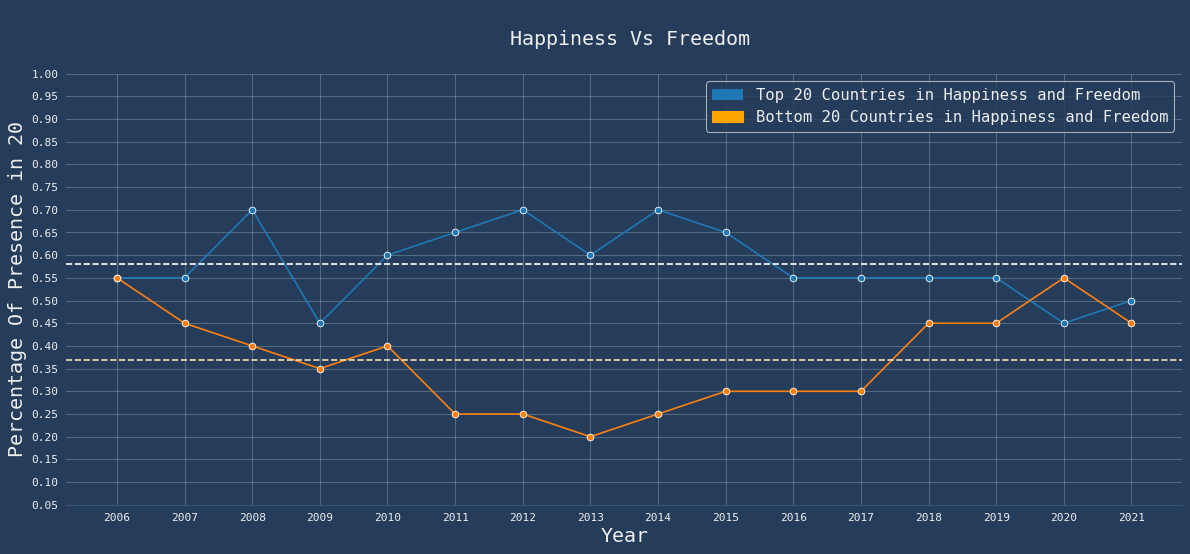

In [126]:
plot_Top_bottom(Freedom_Asce,Freedom_Desc,'Freedom')

> On Average `60` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `freedom` score 

> On Average `35` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `freedom` score 

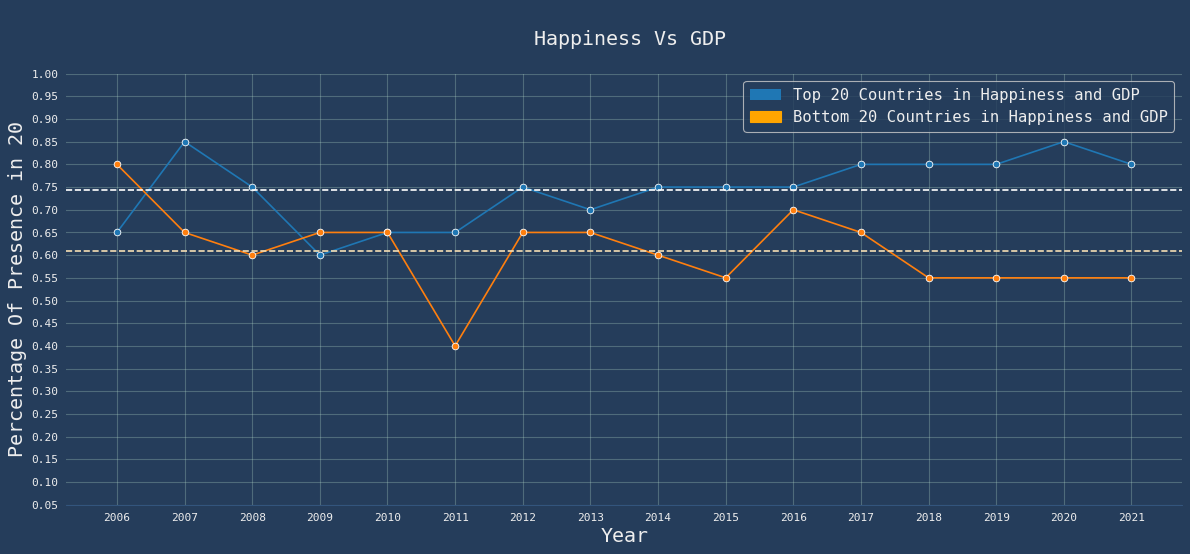

In [103]:
plot_Top_bottom(GDP_Asce,GDP_Desc,'GDP')

> On Average `75` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `GDP per Capita` score 

> On Average `60` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `GDP per Capita` score 

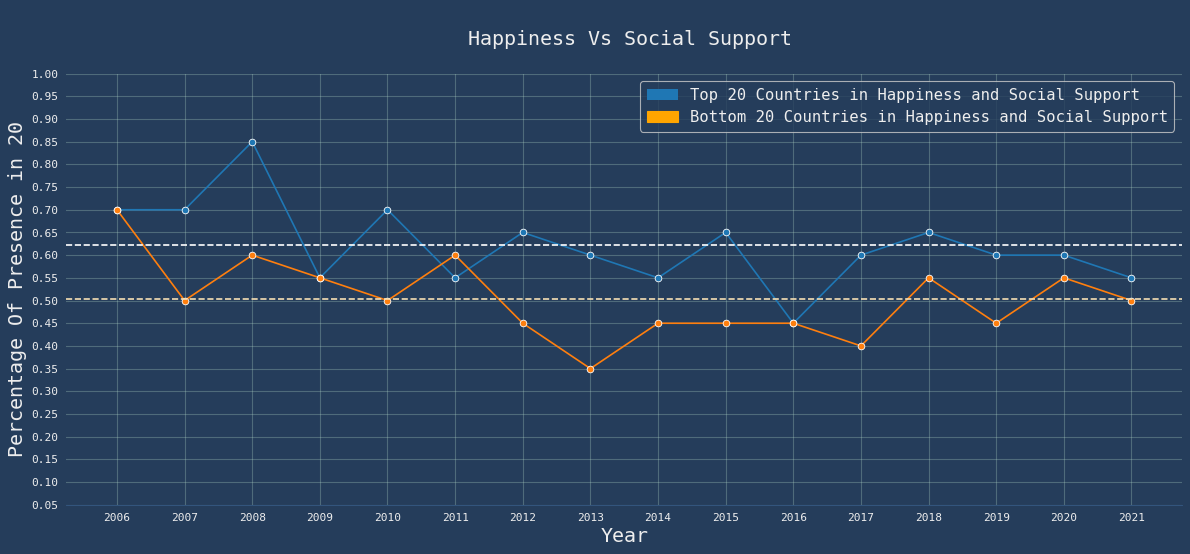

In [104]:
plot_Top_bottom(Social_Asce,Social_Desc,'Social Support')

> On Average `60` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Social Support` score 

> On Average `50` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Social Support` score 

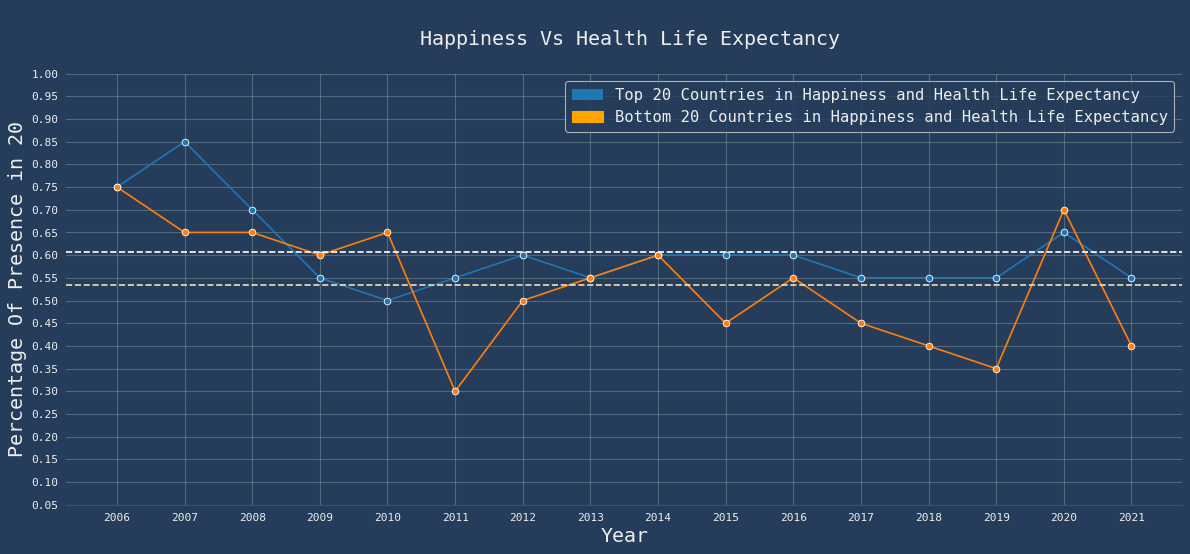

In [105]:
plot_Top_bottom(Health_Asce,Health_Desc,'Health Life Expectancy')

> On Average `60` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Health Life Expectancy` score 

> On Average `55` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Health Life Expectancy` score 

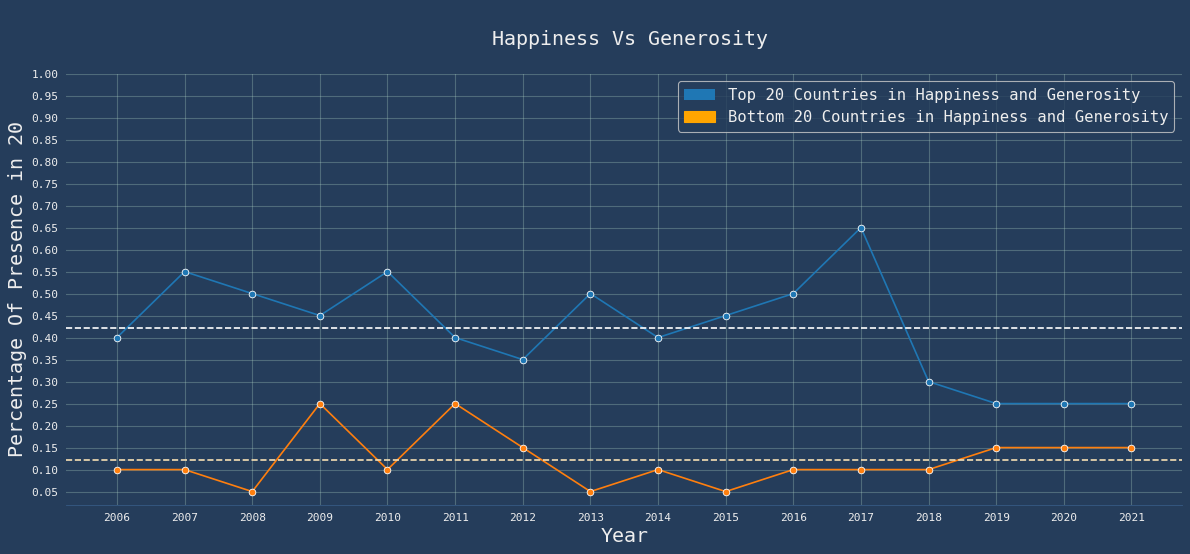

In [106]:
plot_Top_bottom(Generosity_Asce,Generosity_Desc,'Generosity')

> On Average `45` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Generosity` score 

> On Average `10` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Generosity` score 

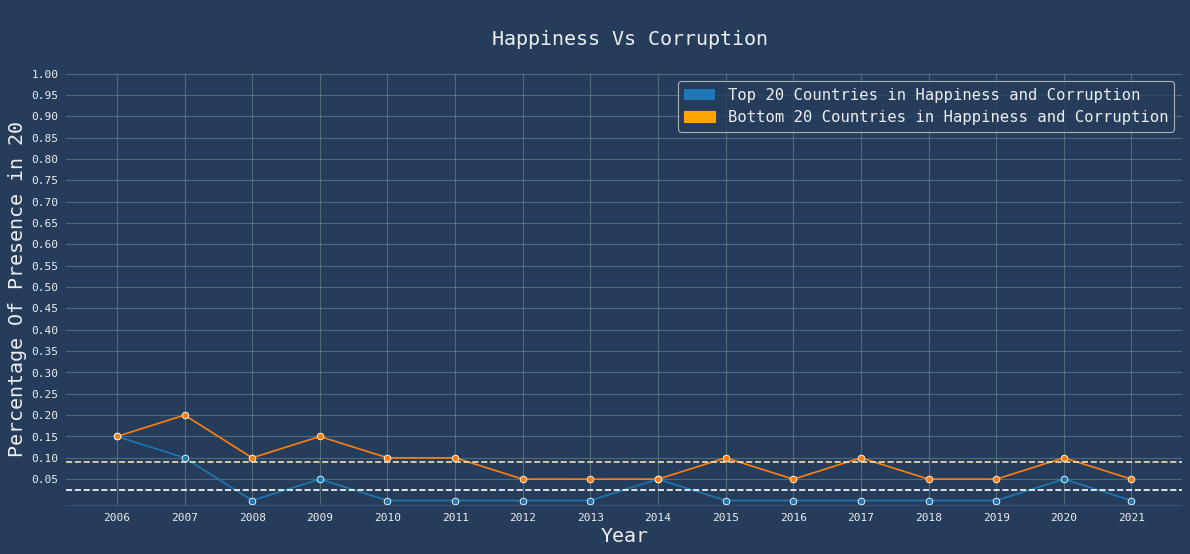

In [107]:
plot_Top_bottom(Corrup_Asce,Corrup_Desc,'Corruption')

> On Average `5` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Corruption` score 

> On Average `10` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Corruption` score 

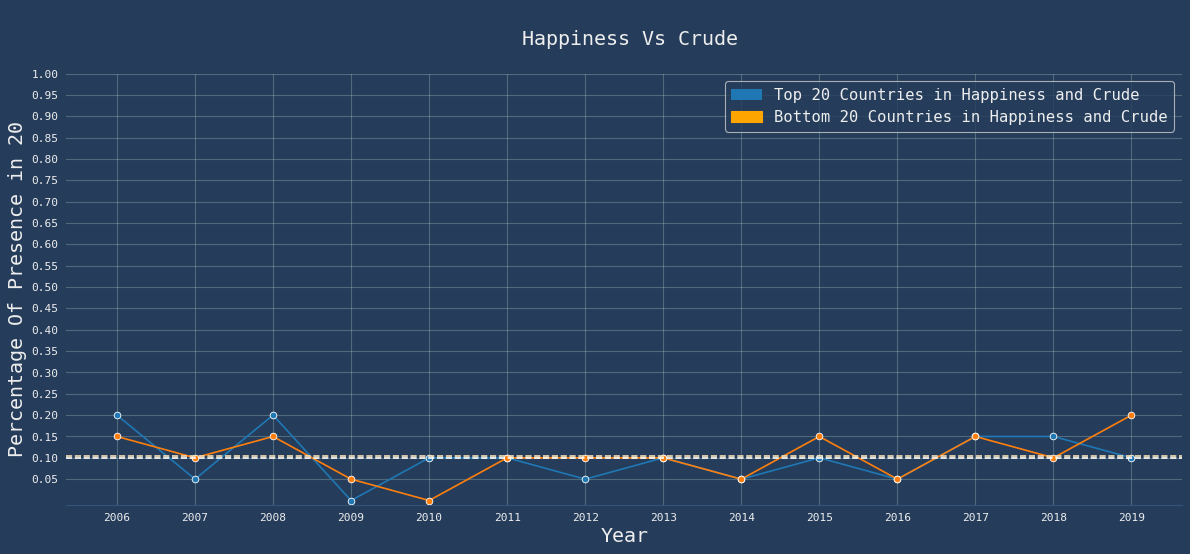

In [108]:
plot_Top_bottom(Crude_Asce,Crude_Desc,'Crude')

> On Average `10` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Crude Suicide` score 

> On Average `10` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Crude Suicide` score 

### Avoiding Outliers in Crude Rate to Compare results

In [116]:
df_WHR_sui_merg.describe().T

count         mean       std       min  \
year                              1735.0  2012.896830  4.003785  2005.000   
Life Ladder                       1735.0     5.468263  1.125754     2.375   
Log GDP per capita                1729.0     9.361573  1.146901     6.635   
Social support                    1726.0     0.813615  0.118186     0.291   
Healthy life expectancy at birth  1735.0    63.398686  7.457788    32.300   
Freedom to make life choices      1707.0     0.742696  0.140762     0.258   
Generosity                        1678.0    -0.002415  0.164721    -0.335   
Perceptions of corruption         1637.0     0.750674  0.186078     0.035   
Positive affect                   1719.0     0.711706  0.107268     0.322   
Negative affect                   1723.0     0.266724  0.081557     0.095   
Crude                             1735.0    10.307424  7.889194     0.560   

                                        25%       50%        75%       max  
year                              2010.0000  2013.000  2016.0000  2019.000  
Life Ladder                          4.6355     5.374     6.2945     8.019  
Log GDP per capita                   8.4530     9.461    10.3310    11.648  
Social support                       0.7490     0.838     0.9080     0.987  
Healthy life expectancy at birth    58.7500    65.200    68.5000    77.100  
Freedom to make life choices         0.6460     0.760     0.8555     0.985  
Generosity                          -0.1180    -0.030     0.0880     0.698  
Perceptions of corruption            0.6960     0.805     0.8750     0.983  
Positive affect                      0.6280     0.725     0.8030     0.944  
Negative affect                      0.2060     0.256     0.3160     0.591  
Crude                                5.2300     8.040    12.8750    87.000

In [117]:
12.875 + (1.5*8.040)

24.935

<AxesSubplot: >

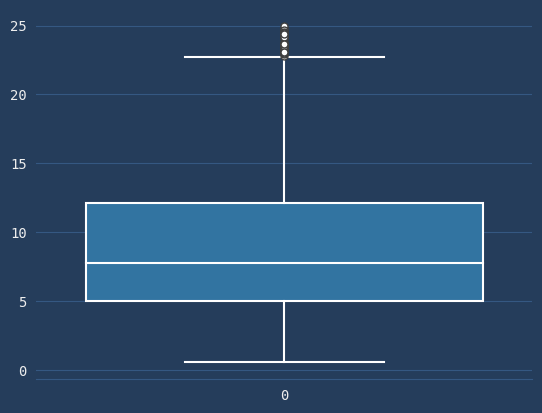

In [13]:
sns.boxplot(df_WHR_sui_merg[df_WHR_sui_merg['Crude']<12.875 + (1.5*8.040)]['Crude'],**PROPS)

In [132]:
Crude_Asce = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg[df_WHR_sui_merg['Crude']<12.875 + (1.5*8.040)],i,'Life Ladder','Crude', 'Country name' )] for i in reversed(range(2019,2005,-1))]
Crude_Asce= pd.DataFrame(Crude_Asce, columns =['Year', 'Percentage']) 
Crude_Desc = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg[df_WHR_sui_merg['Crude']<12.875 + (1.5*8.040)],i,'Life Ladder','Crude','Country name',ascending= True )] for i in reversed(range(2019,2005,-1))]
Crude_Desc= pd.DataFrame(Crude_Desc, columns =['Year', 'Percentage']) 

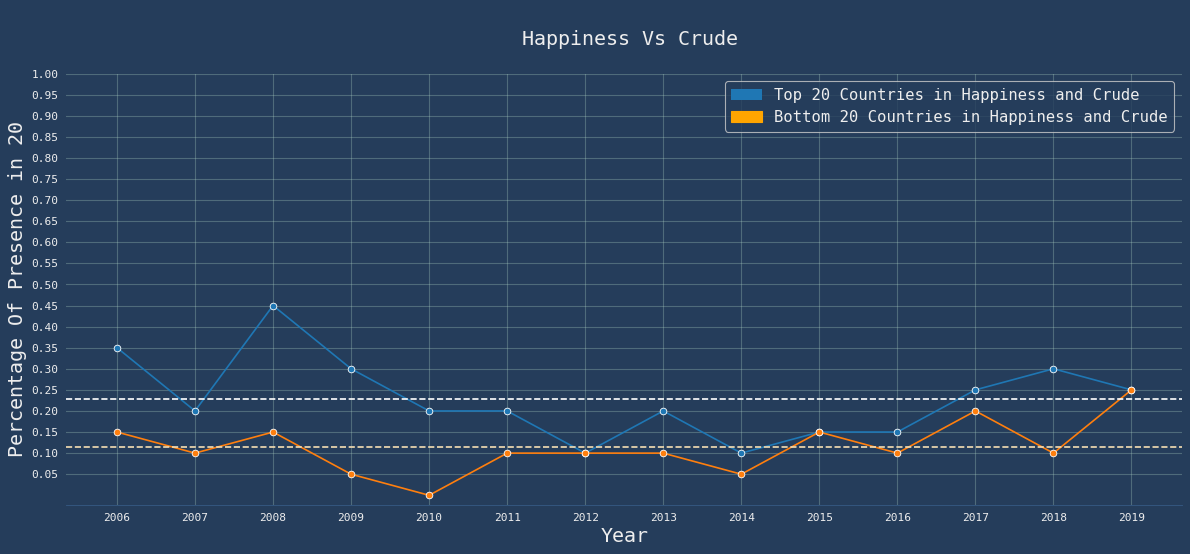

In [133]:
plot_Top_bottom(Crude_Asce,Crude_Desc,'Crude')

> On Average `20` % of __the top 20 countries__ with the heighst `Ladder Score` have the heighest  `Crude Suicide` score 

> On Average `10` % of __the Bottom 20 countries__ with the lowest `Ladder Score` have the lowest  `Crude Suicide` score 

### Observations of Years

In [20]:
df_merged.year.value_counts()

2021    144
2017    139
2019    139
2018    138
2016    133
2014    133
2015    133
2011    132
2012    130
2013    128
2010    114
2009    105
2008    103
2007     97
2020     92
2006     84
2005     27
Name: year, dtype: int64

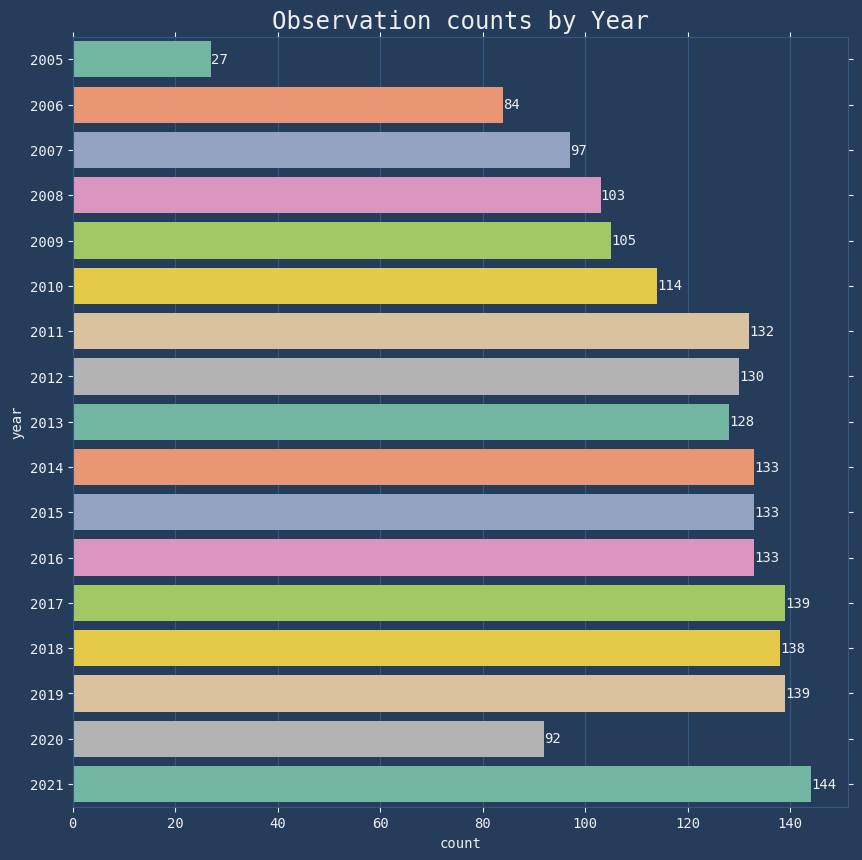

In [282]:
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Year',fontsize = 'xx-large');
y = sns.countplot(data = df_merged,y ='year', ax = ax,palette=sns.color_palette('Set2', 16));
labels = [str(v) if v else '' for v in y.containers[0].datavalues.astype(int)]
y.bar_label(container=y.containers[0],labels = labels)
fig.savefig("4_Extracted_Figures/Observation_counts_by_Year.png", dpi=200)
plt.show()

> `2005` ,`2020` have Very low # of observations:
- __2005__ : the Initiation of World Happinness Report 
- __2020__ : `Covid-19` Pandemic

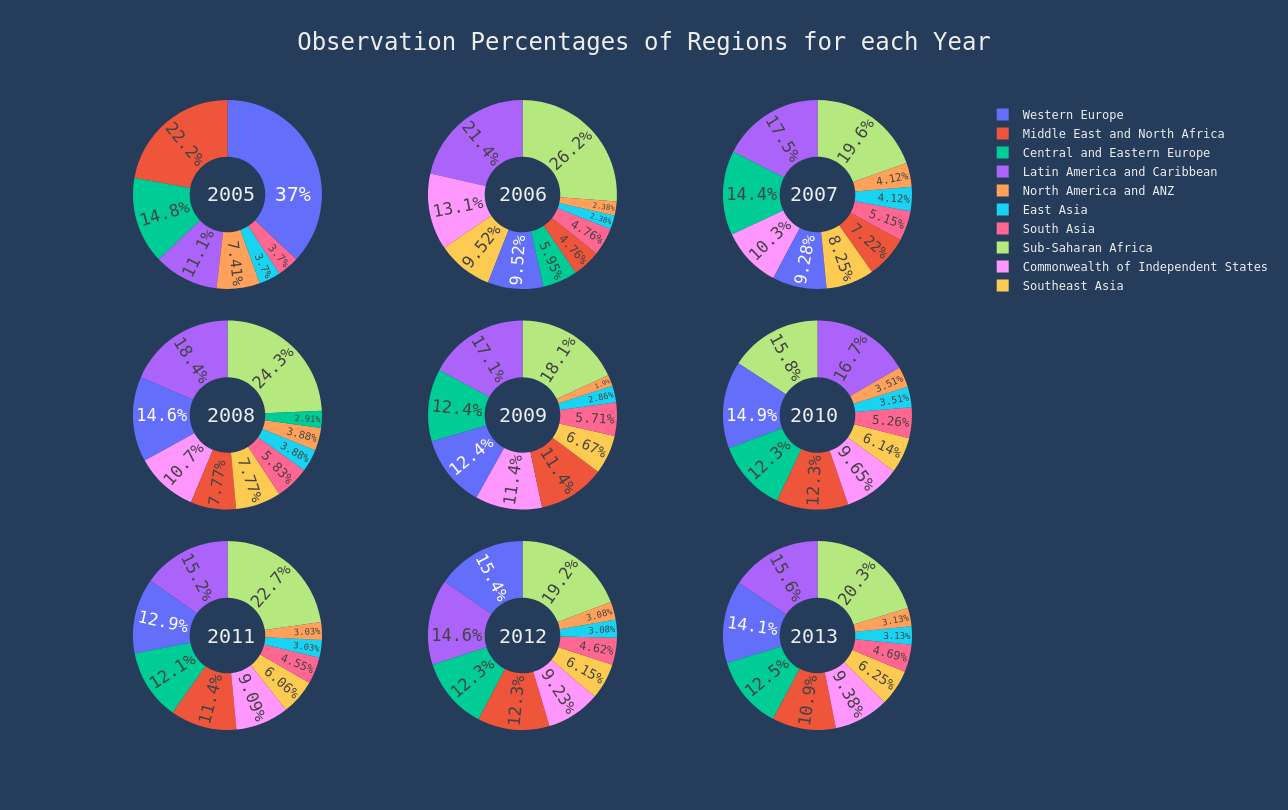

In [144]:
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
subplot_names = ['2005','2006','2007','2008','2009','2010','2011','2012','2013']


fig = make_subplots(3, 3, specs=specs,horizontal_spacing=0,vertical_spacing=0.05)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2005].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2005].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2005',domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2006].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2006].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2006',domain=dict(x=[0, 0.5]),hole=0.4),row=1, col=2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2007].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2007].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2007',domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 3)


fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2008].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2008].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2008',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2009].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2009].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2009',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2010].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2010].groupby('Regional indicator')['Country name'].nunique().sort_values().index, 
    name='2010',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 3)


fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2011].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2011].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2011',domain=dict(x=[0, 0.5]),hole=0.4),row=3, col=1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2012].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2012].groupby('Regional indicator')['Country name'].nunique().sort_values().index, 
    name='2012',domain=dict(x=[0, 0.5]),hole=0.4),row=3, col=2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2013].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2013].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2013',domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 3)


fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent', insidetextorientation='radial')
fig.update_layout(height=810, width=1440,plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"),
                  annotations=[
                      dict(text='2005', x=0.14, y=0.875, font_size=20, showarrow=False),
                      dict(text='2006', x=0.50, y=0.875, font_size=20, showarrow=False),
                      dict(text='2007', x=0.86, y=0.875, font_size=20, showarrow=False),
                      
                      dict(text='2008', x=0.14, y=0.5, font_size=20, showarrow=False),
                      dict(text='2009', x=0.50, y=0.5, font_size=20, showarrow=False),
                      dict(text='2010', x=0.86, y=0.5, font_size=20, showarrow=False),
                      
                      dict(text='2011', x=0.14, y=0.125, font_size=20, showarrow=False),
                      dict(text='2012', x=0.50, y=0.125, font_size=20, showarrow=False),
                      dict(text='2013', x=0.86, y=0.125, font_size=20, showarrow=False)],
                  
                  title={
    "text": "Observation Percentages of Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}})
fig.show()

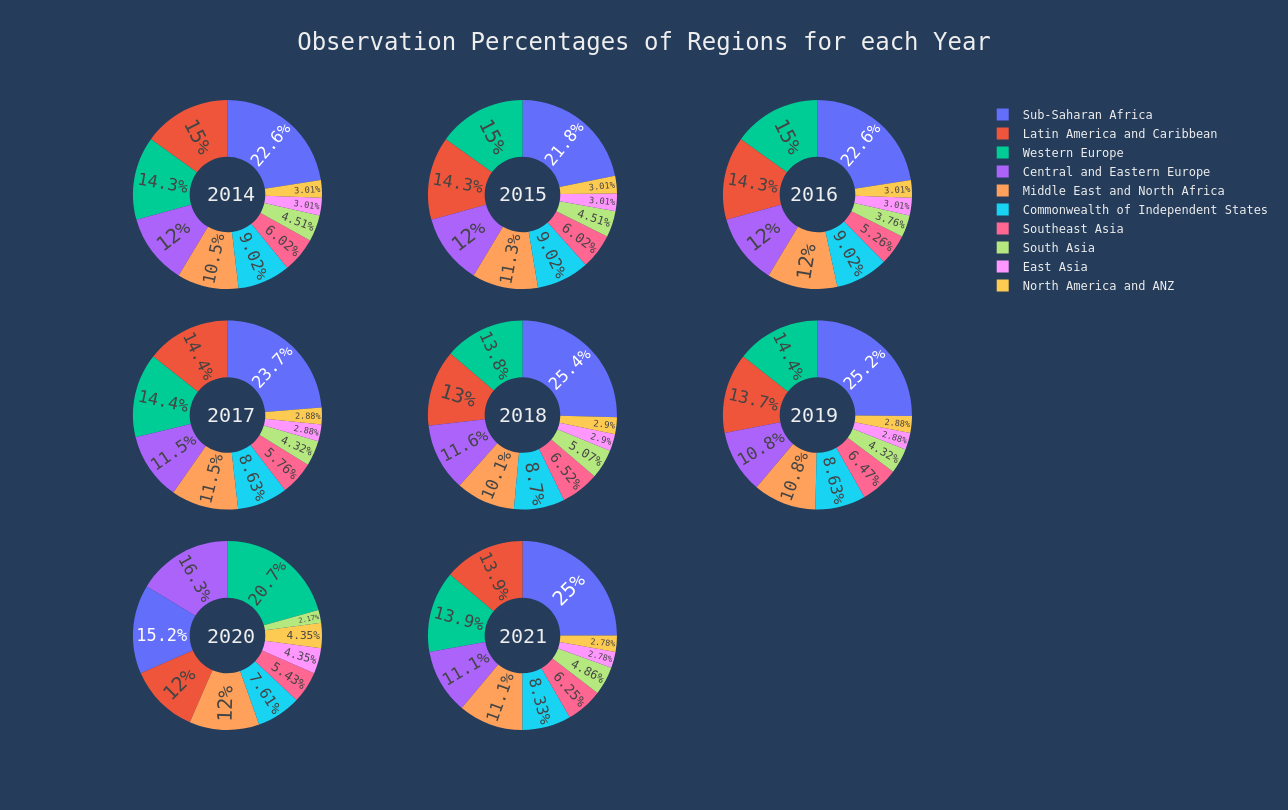

In [145]:
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
subplot_names = ['2014','2015','2016','2017','2018','2019','2020','2021']

fig = make_subplots(3, 3, specs=specs,horizontal_spacing=0,vertical_spacing=0.05)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2014].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2014].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2015].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2015].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2016].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2016].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 3)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2017].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2017].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2018].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2018].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2019].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2019].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 3)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2020].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2020].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2021].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2021].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 2)

fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent', insidetextorientation='radial')
fig.update_layout(height=810, width=1440,plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"),
                  annotations=[
                      dict(text='2014', x=0.14, y=0.875, font_size=20, showarrow=False),
                      dict(text='2015', x=0.50, y=0.875, font_size=20, showarrow=False),
                      dict(text='2016', x=0.86, y=0.875, font_size=20, showarrow=False),
                      
                      dict(text='2017', x=0.14, y=0.5, font_size=20, showarrow=False),
                      dict(text='2018', x=0.50, y=0.5, font_size=20, showarrow=False),
                      dict(text='2019', x=0.86, y=0.5, font_size=20, showarrow=False),
                      
                      dict(text='2020', x=0.14, y=0.125, font_size=20, showarrow=False),
                      dict(text='2021', x=0.50, y=0.125, font_size=20, showarrow=False)],
                  title={
    "text": "Observation Percentages of Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}})

fig.show()

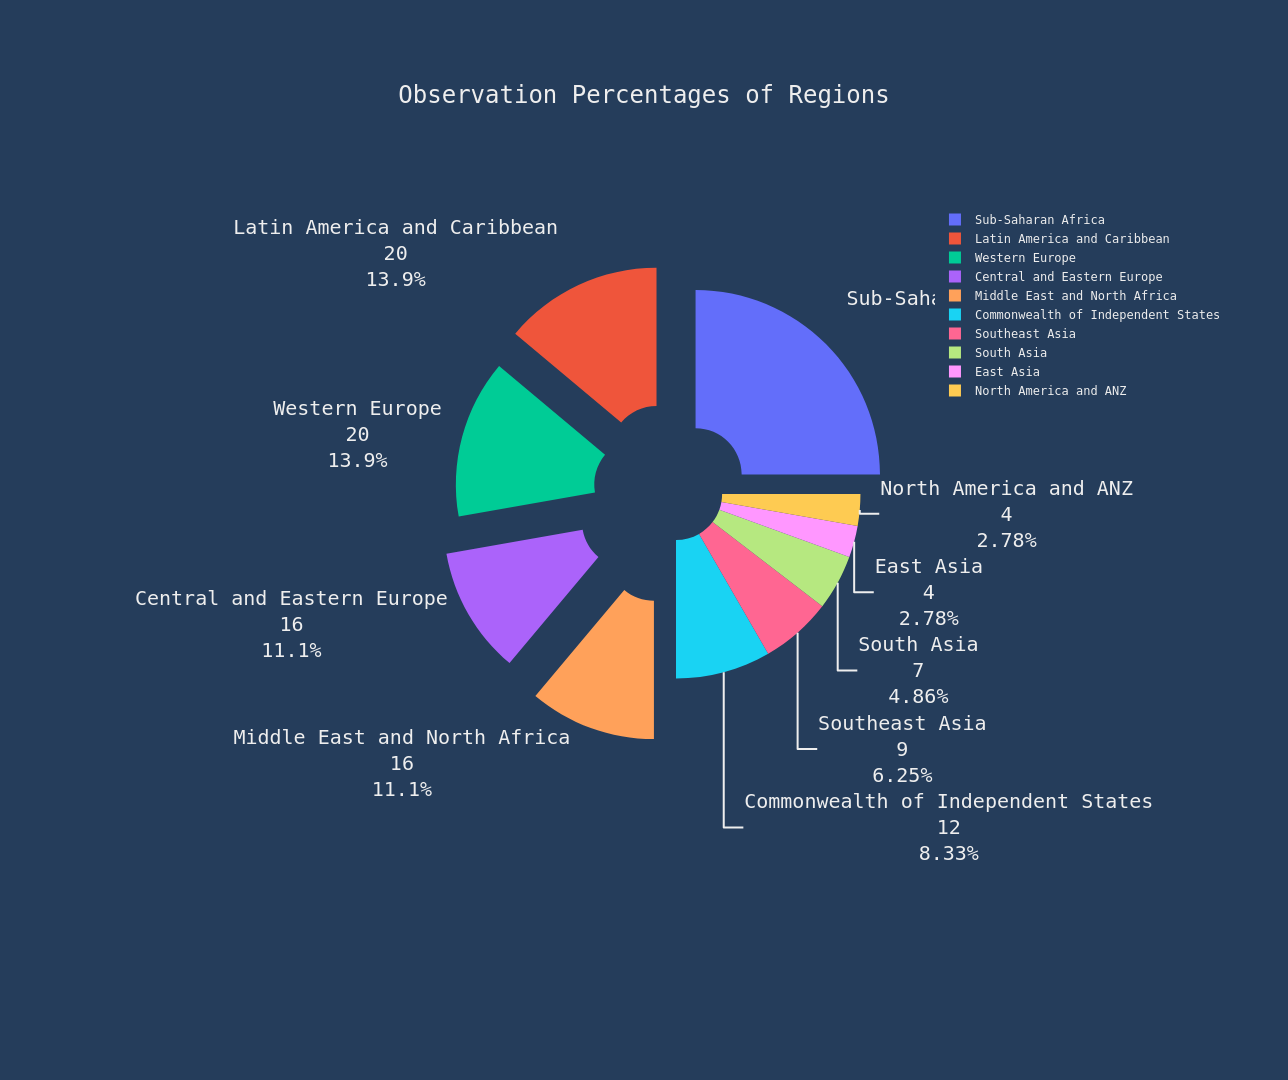

In [146]:
fig = go.Figure(go.Pie(values=df_merged.groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
              labels=df_merged.groupby('Regional indicator')['Country name'].nunique().sort_values().index,hole=0.25 ,pull=[0.0,0.0, 0.0, 0.0,0.0,0.30, 0.35, 0.25,0.20, 0.15]))
fig.update_traces(textposition='outside', textfont_size=20, textinfo='label+percent+value', insidetextorientation='radial')
fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),
    autosize=False,
    width=1920,
    height=1080,
title={
    "text": "Observation Percentages of Regions",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}})
fig.show()


In [147]:
df_WHR_sui_merg[df_WHR_sui_merg['Regional indicator']== 'Commonwealth of Independent States'] ['Country name'].unique()

array(['Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan',
       'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan',
       'Turkmenistan', 'Ukraine', 'Uzbekistan'], dtype=object)

In [148]:
df_sui_merg.columns

Index(['Country name', 'year', 'Gender', 'Crude Rate',
       'Lower Whisker Crude Rate', 'Upper Whisker Crude Rate',
       'Regional indicator'],
      dtype='object')

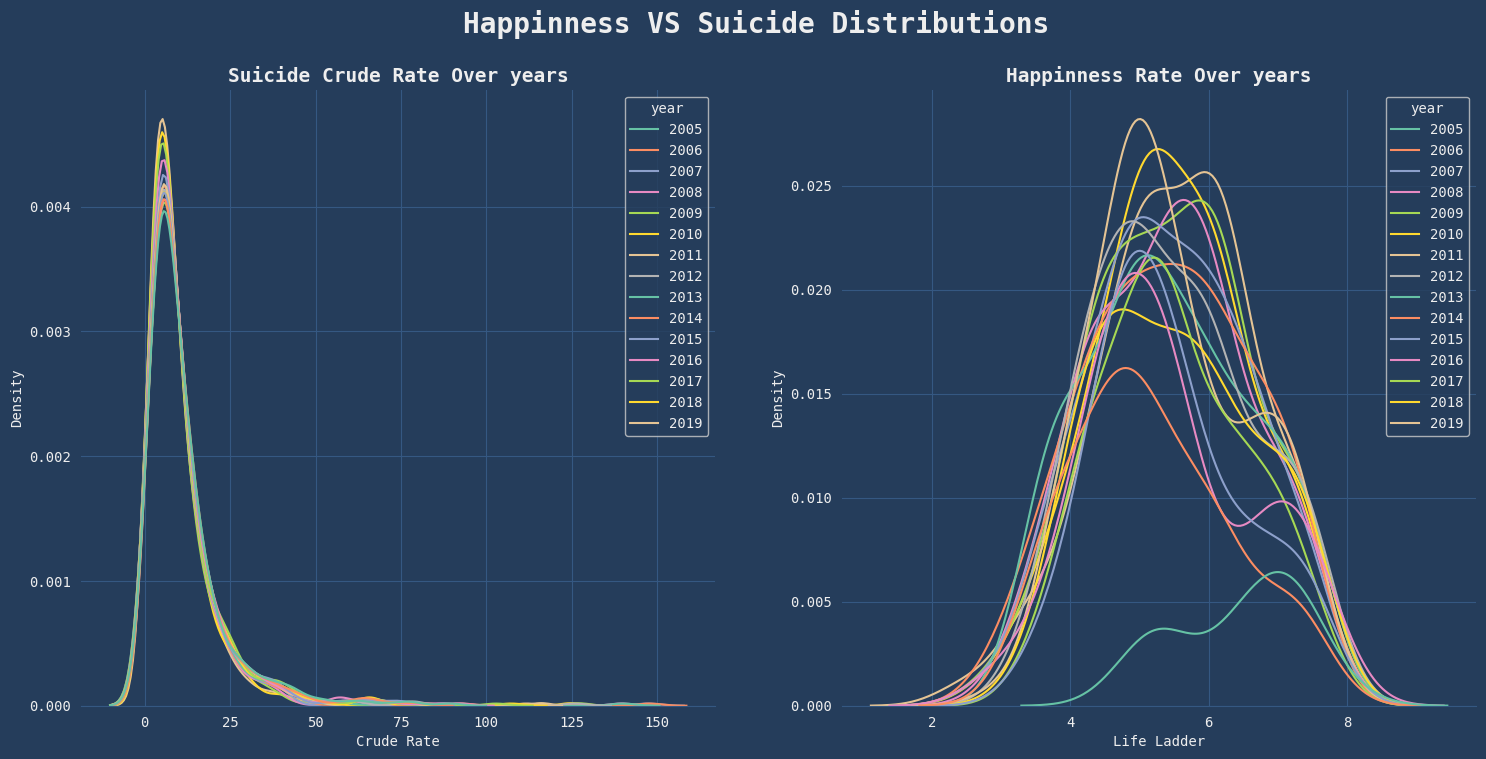

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle('Happinness VS Suicide Distributions',fontsize = 20,fontweight = 'bold')

sns.kdeplot(ax = axes[0],data=df_sui_merg[df_sui_merg['year']>2004], x='Crude Rate', hue='year',palette='Set2')
axes[0].set_title('Suicide Crude Rate Over years',fontsize = 14,fontweight = 'bold')

sns.kdeplot(ax = axes[1],data=df_WHR_sui_merg, x='Life Ladder', hue='year',  palette='Set2')
_=axes[1].set_title('Happinness Rate Over years',fontsize = 14,fontweight = 'bold')
fig.savefig("4_Extracted_Figures/Happinnes_VS_Suicide_Distributions.png", dpi=200)

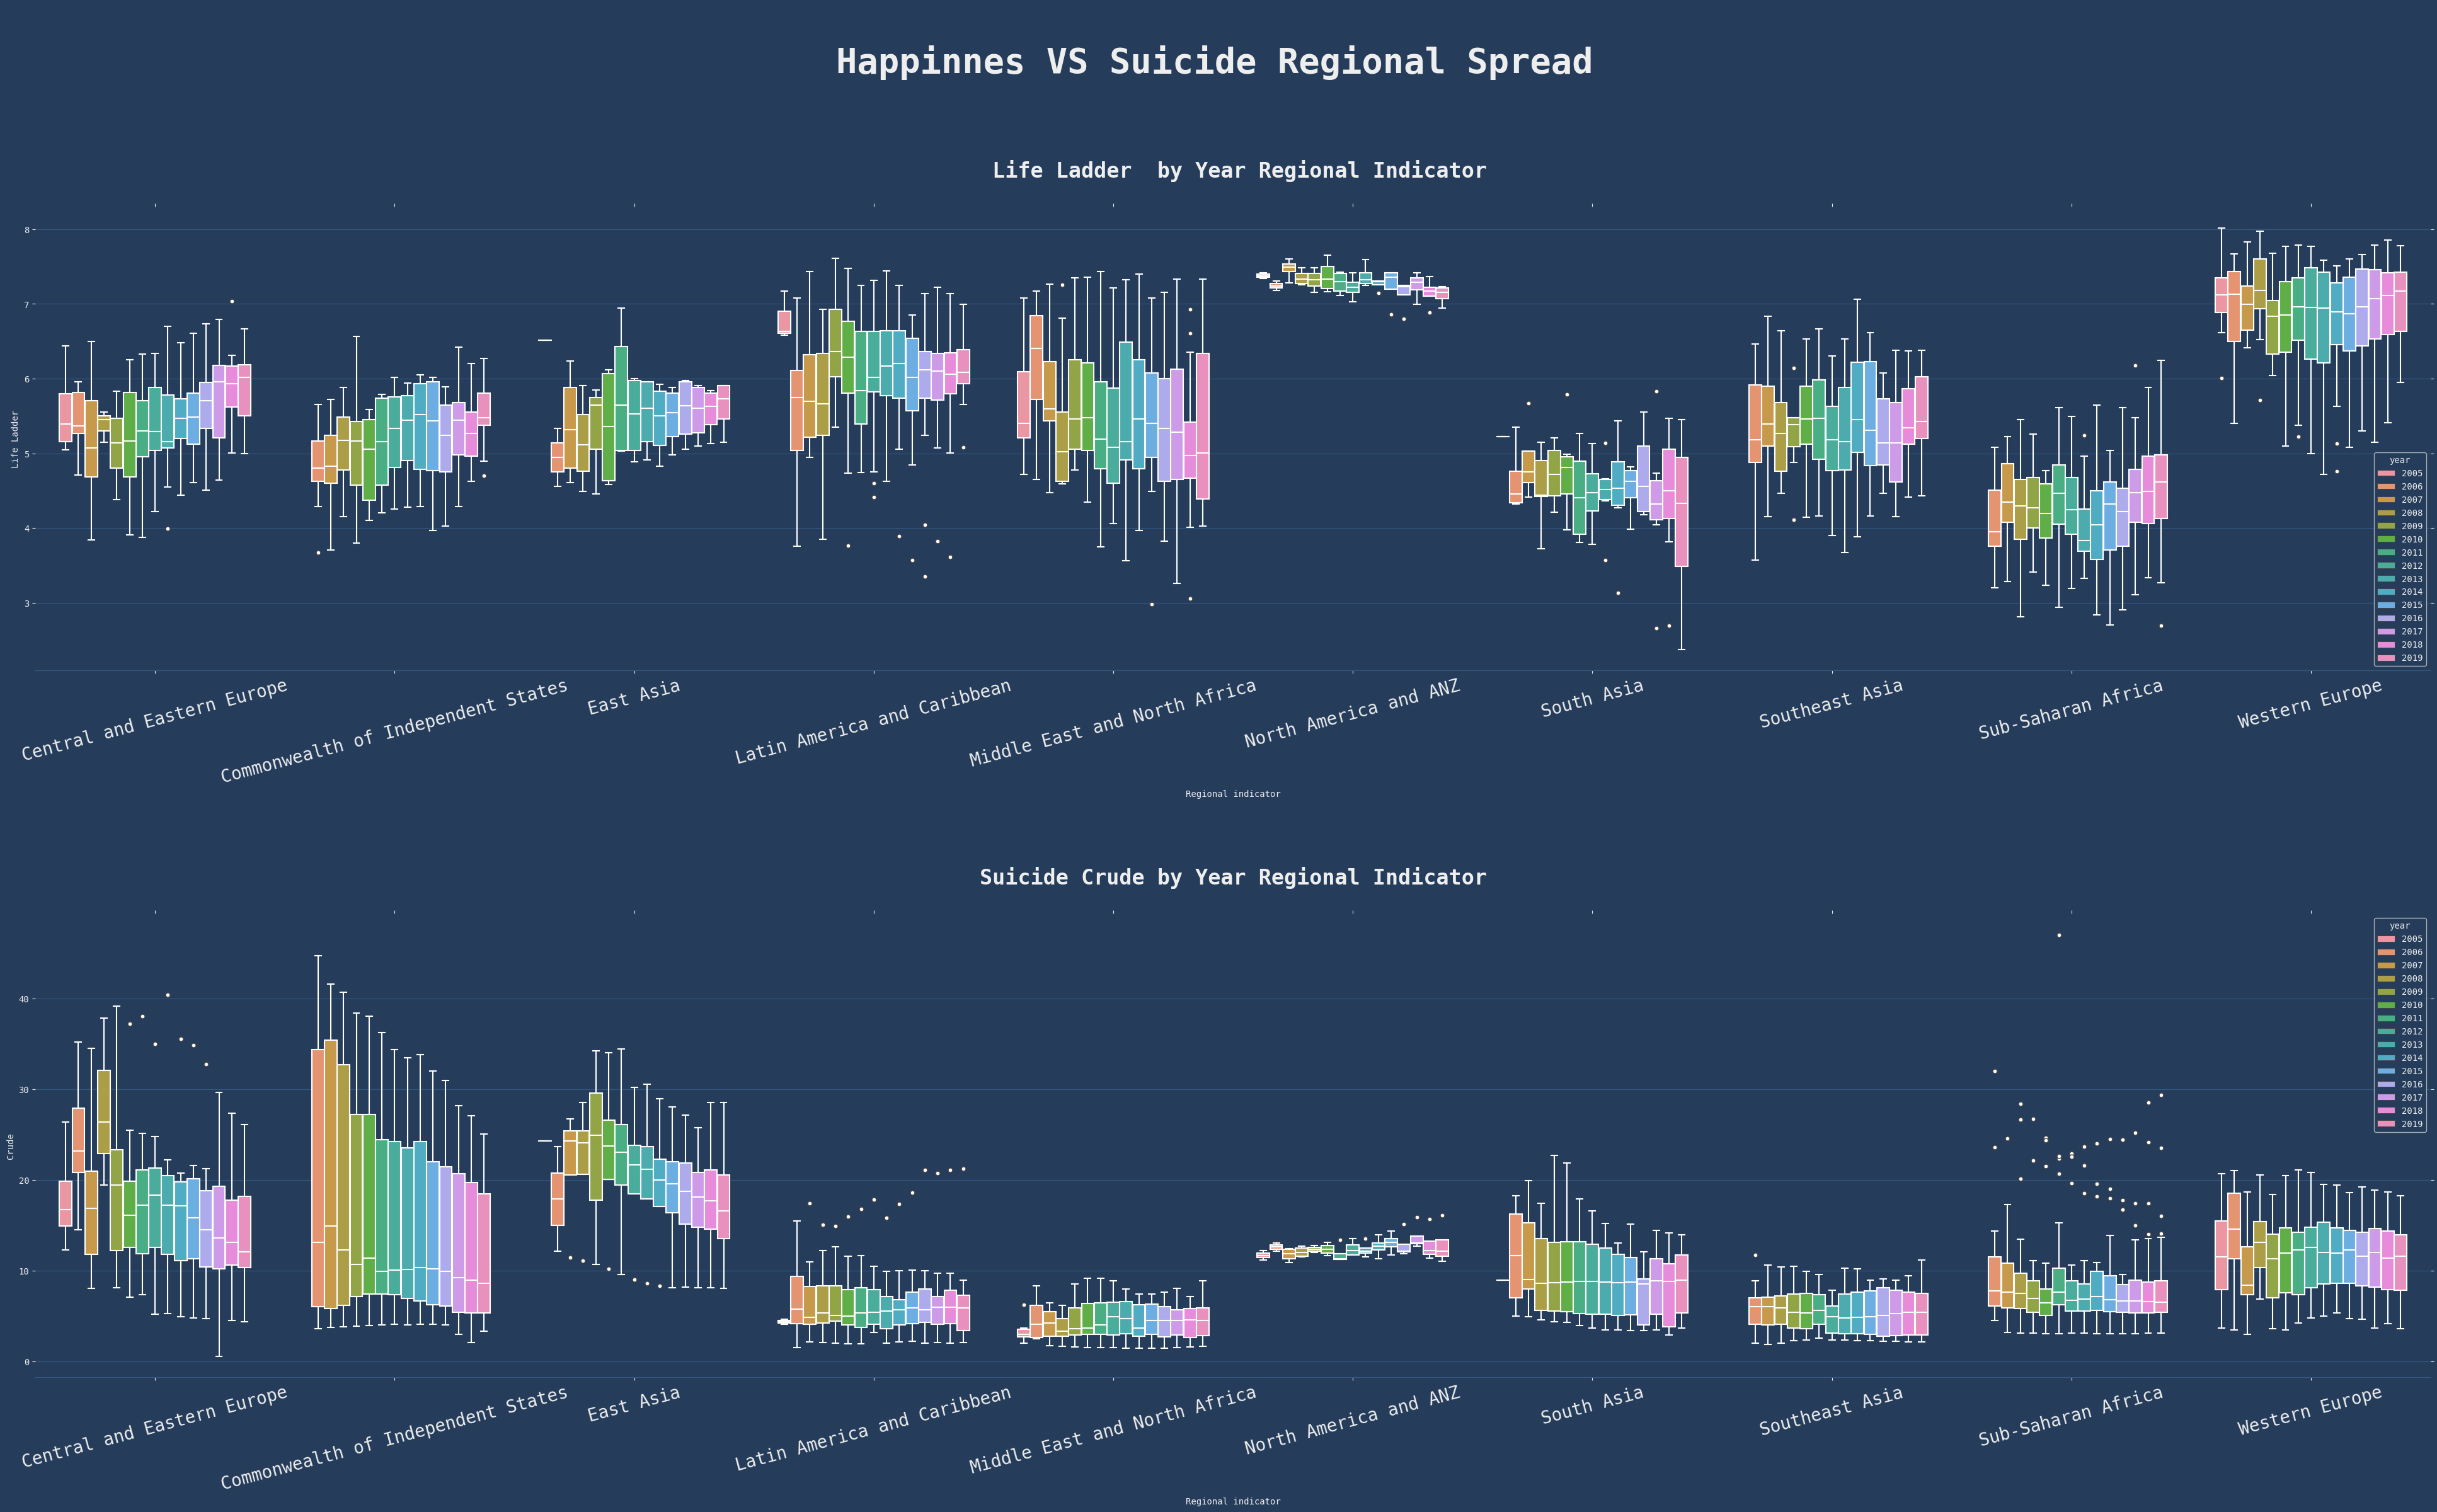

In [18]:
fig,ax = plt.subplots(2,1,figsize = (40,25),)
fig.suptitle('\nHappinnes VS Suicide Regional Spread',fontsize = 40,fontweight = 'bold')


sns.boxplot(ax=ax[0],data = df_WHR_sui_merg.sort_values('Regional indicator',ascending=True),x = 'Regional indicator', y = 'Life Ladder',hue='year',**PROPS)
ax[0].set_title('\n Life Ladder  by Year Regional Indicator\n',fontsize = 24,fontweight = 'bold')
ax[0].xaxis.set_ticks_position('both')
ax[0].yaxis.set_ticks_position('both')
ax[0].tick_params(axis='x',labelsize=20,rotation = 15)

sns.boxplot(ax=ax[1],data = df_WHR_sui_merg[df_WHR_sui_merg['Crude']<50].sort_values('Regional indicator',ascending=True),
            x = 'Regional indicator', y = 'Crude',hue='year',**PROPS)
ax[1].set_title('\nSuicide Crude by Year Regional Indicator\n',fontsize = 24,fontweight = 'bold')

ax[1].xaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')
ax[1].tick_params(axis='x', labelsize=20,rotation = 15)

fig.tight_layout(pad=5.0)
fig.savefig("4_Extracted_Figures/Life_Ladder_Suicide_Crude_by_Year_Regional_Indicator.png", dpi=200)
plt.show()

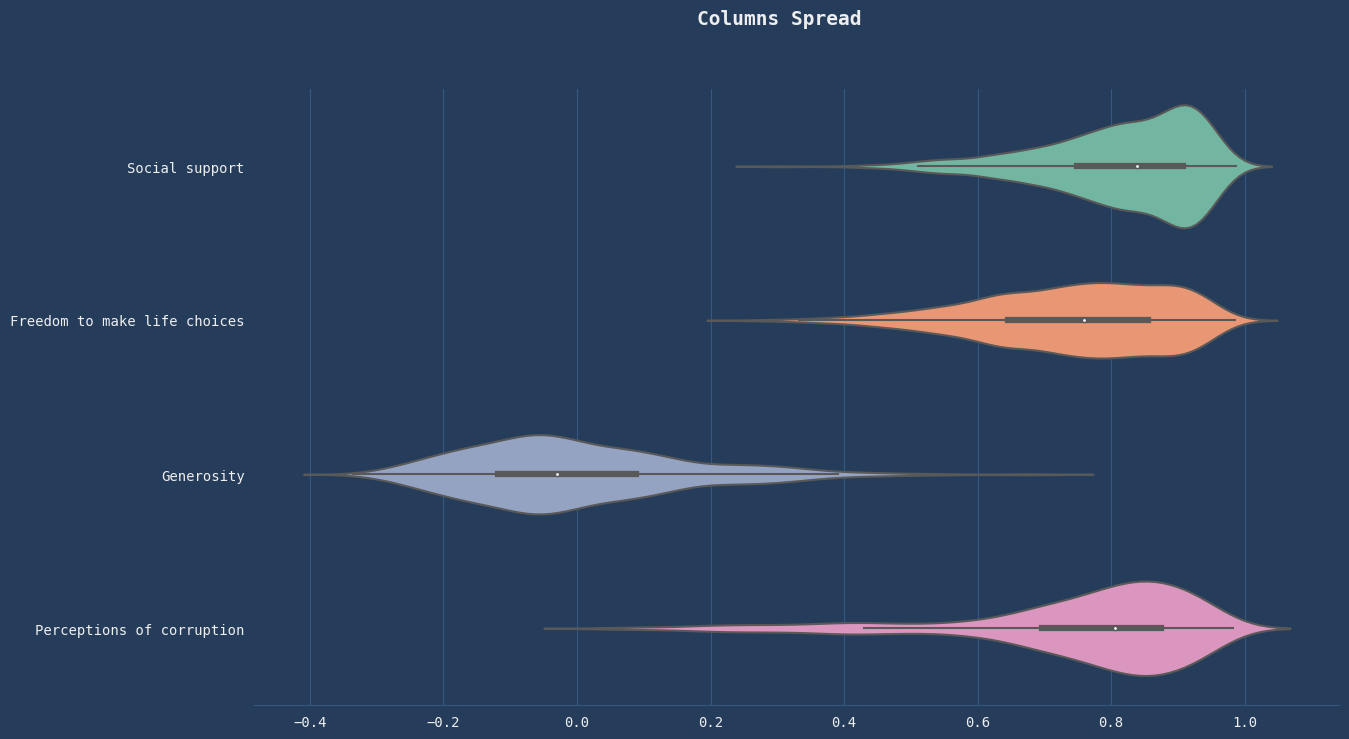

In [151]:
list_features = ["Social support", "Freedom to make life choices",
                 "Generosity",
                 "Perceptions of corruption"
                ]
plt.figure(figsize=(14,8))
sns.violinplot(data=df_WHR_sui_merg.loc[:, list_features], orient="h",palette='Set2')
plt.suptitle('Columns Spread',fontsize = 14,fontweight = 'bold')
plt.savefig("4_Extracted_Figures/Columns_distripution_part1", dpi=400)
plt.show()

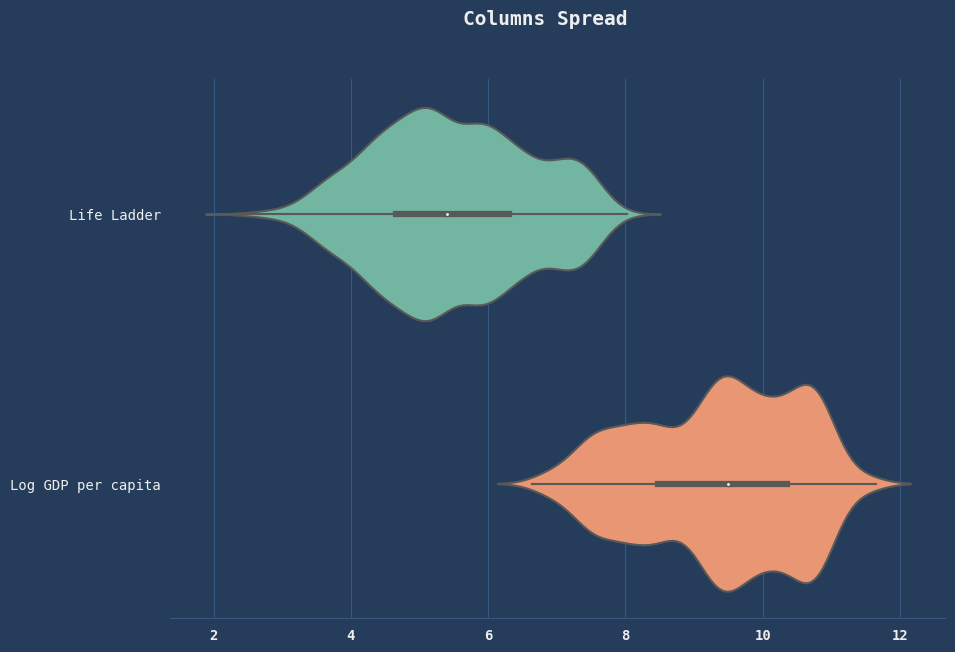

In [152]:
list_features = ["Life Ladder", "Log GDP per capita"]
plt.figure(figsize=(10,7))

sns.violinplot(data=df_merged.loc[:, list_features], orient="h", palette="Set2")
plt.xticks(fontweight="bold")
plt.suptitle('Columns Spread',fontsize = 14,fontweight = 'bold')
plt.savefig("4_Extracted_Figures/Columns_distripution_part2", dpi=400)
plt.show()

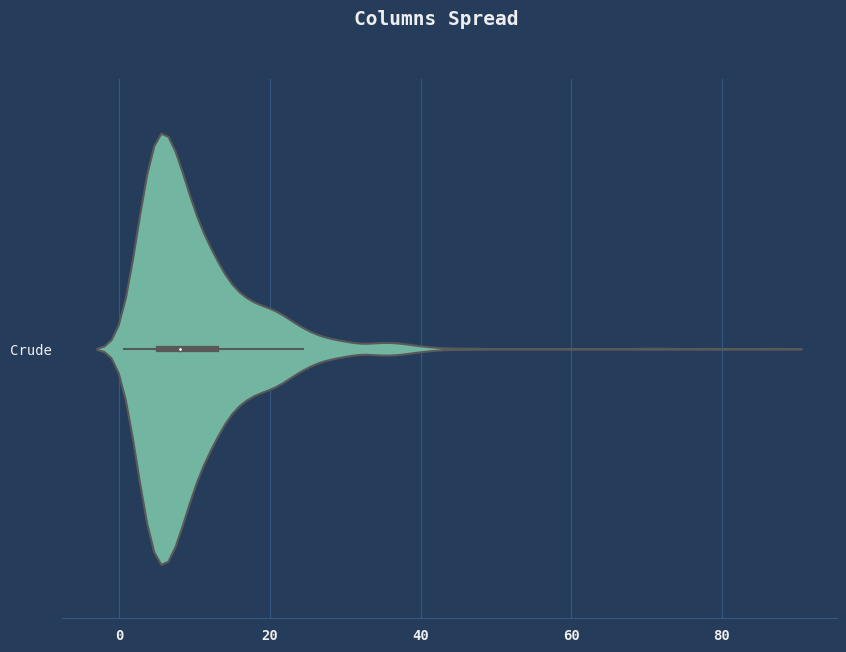

In [153]:

list_features = ["Crude"]

plt.figure(figsize=(10,7))
sns.violinplot(data=df_WHR_sui_merg.loc[:, list_features], orient="h", palette="Set2")
plt.xticks(fontweight="bold")
plt.suptitle('Columns Spread',fontsize = 14,fontweight = 'bold')
plt.savefig("4_Extracted_Figures/Columns_distripution_part3", dpi=400)
plt.show()

In [154]:
cols=df_merged.corr(numeric_only=True)['Life Ladder'].sort_values(ascending=False)
cols

Life Ladder                         1.000000
Log GDP per capita                  0.793623
Healthy life expectancy at birth    0.746204
Social support                      0.712101
Freedom to make life choices        0.524963
Positive affect                     0.519157
Generosity                          0.178734
year                                0.033142
Negative affect                    -0.270726
Perceptions of corruption          -0.453512
Name: Life Ladder, dtype: float64

<Figure size 1000x700 with 0 Axes>

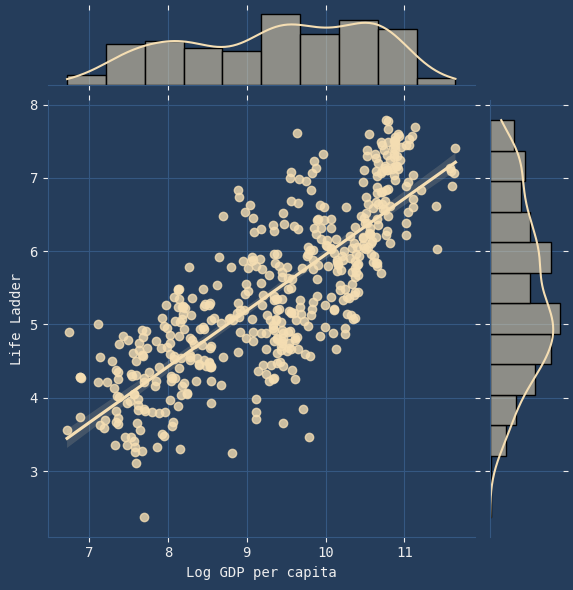

In [263]:
plt.figure(figsize=(10,7))
sns.jointplot(x='Log GDP per capita',y='Life Ladder',data=df_merged.sample(frac=0.25,random_state=1)
,kind='reg',color='wheat')
plt.savefig("4_Extracted_Figures/Joint Plot Log GDP per capita", dpi=200)
plt.show()

In [228]:
cols=df_WHR_sui_merg.corr(numeric_only=True)['Crude'].sort_values(ascending=False)
cols

Crude                               1.000000
Social support                      0.276394
Log GDP per capita                  0.273998
Life Ladder                         0.114906
Healthy life expectancy at birth    0.080133
Perceptions of corruption           0.002382
Freedom to make life choices       -0.024179
year                               -0.071960
Positive affect                    -0.079145
Generosity                         -0.211096
Negative affect                    -0.257065
Name: Crude, dtype: float64

<Figure size 1000x700 with 0 Axes>

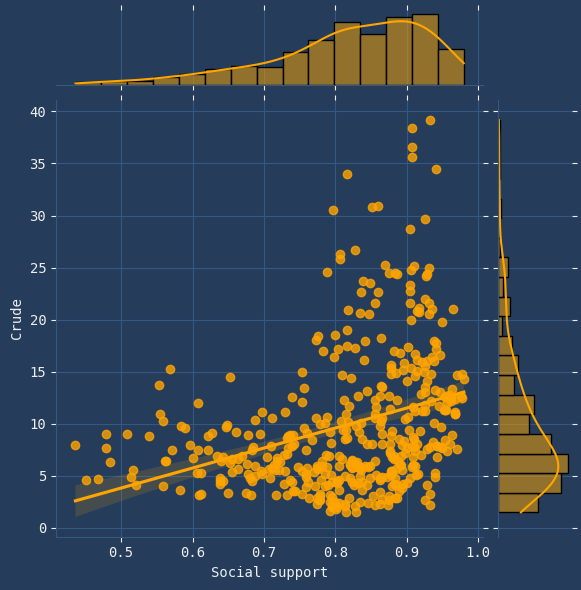

In [253]:
plt.figure(figsize=(10,7))
sns.jointplot(x='Social support',y='Crude',data=df_WHR_sui_merg.sample(frac=0.25,random_state=1),kind='reg',color='orange')
plt.savefig("4_Extracted_Figures/Crude Joint Plot Social support", dpi=200)
plt.show()


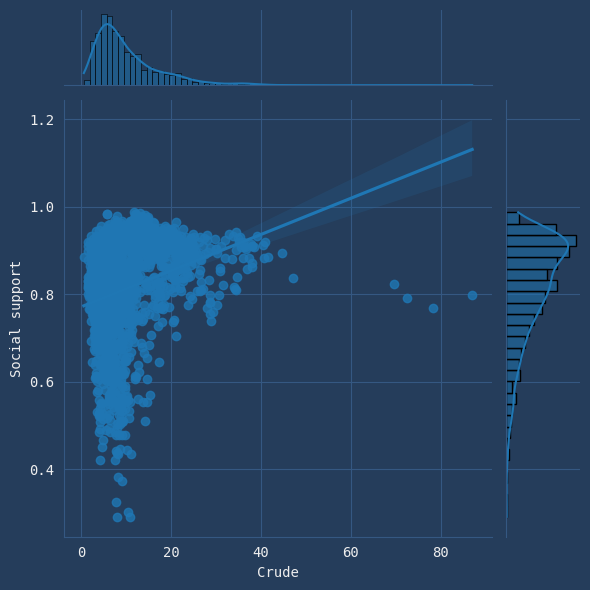

In [228]:
sns.jointplot(x='Crude',y='Social support',data=df_WHR_sui_merg,kind='reg',palette='Set2')

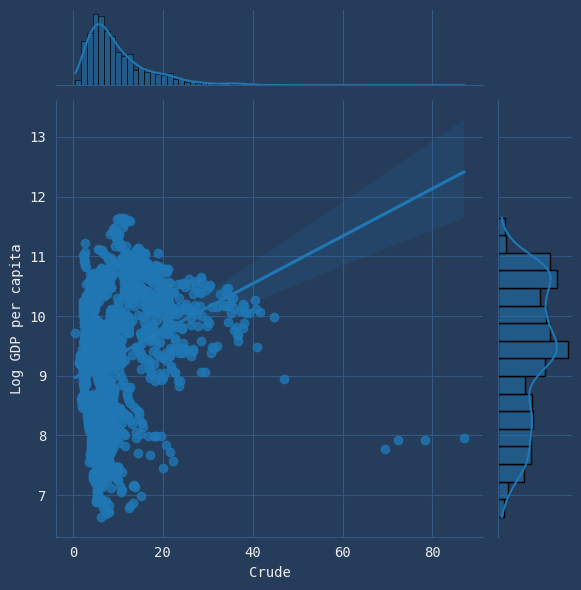

In [227]:
sns.jointplot(x='Crude',y='Log GDP per capita',data=df_WHR_sui_merg,kind='reg',palette='Set2')

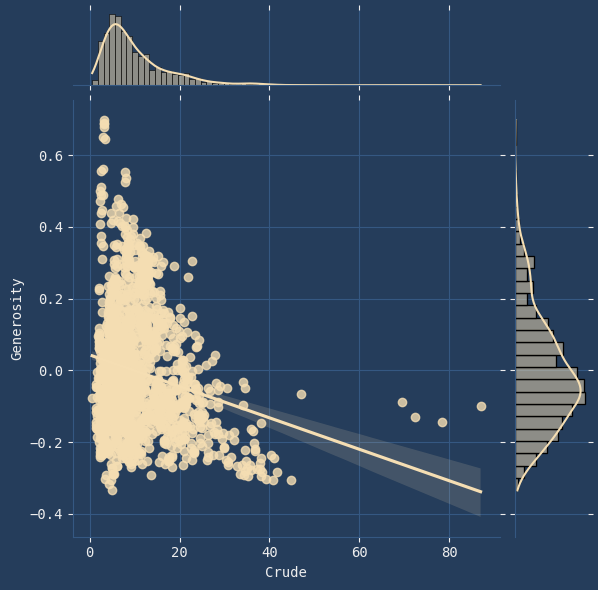

In [257]:
sns.jointplot(x='Crude',y='Generosity',data=df_WHR_sui_merg,kind='reg',color='wheat')

<Figure size 4000x1500 with 0 Axes>

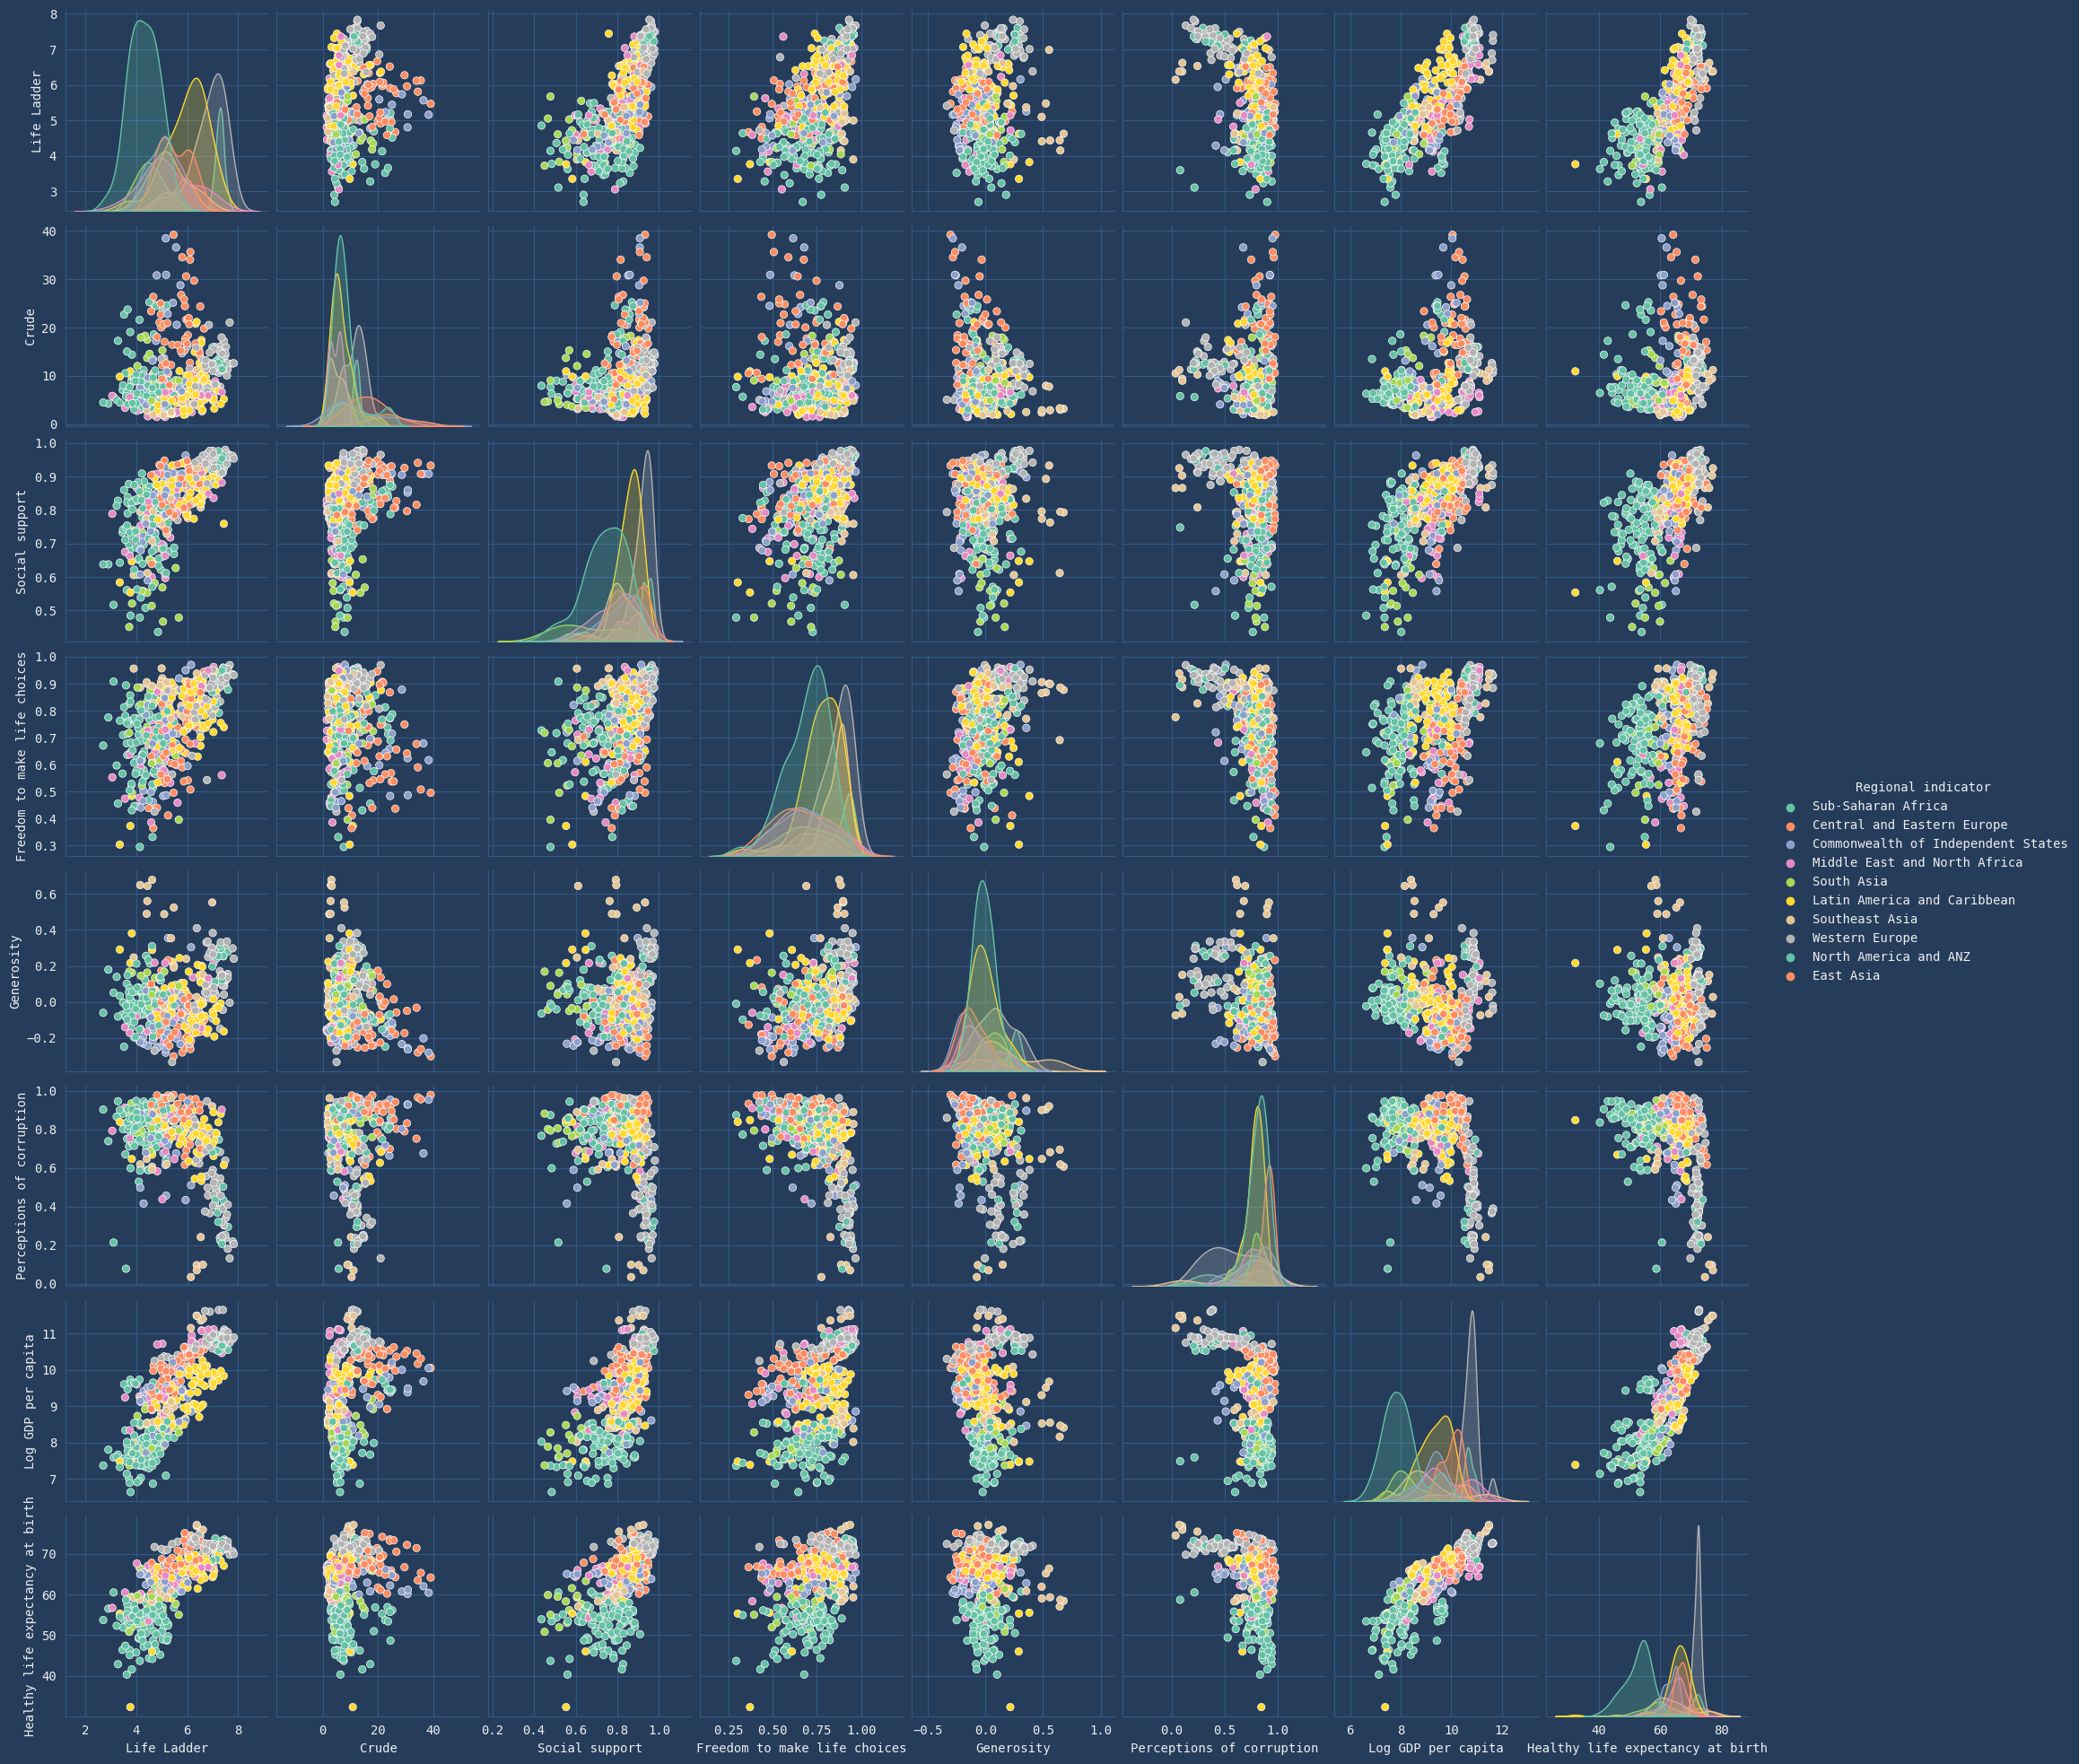

In [7]:
list_features = ["Life Ladder",
                 "Crude",
                 "Social support",
                 "Freedom to make life choices",
                 "Generosity",
                 "Perceptions of corruption",
                 "Log GDP per capita",
                 "Healthy life expectancy at birth",
                 "Regional indicator"
                 ]
plt.figure(figsize=(40,15))

sns.pairplot(df_WHR_sui_merg.loc[:, list_features].sample(frac=0.25,random_state=1),hue ='Regional indicator',palette='Set2')
plt.savefig("4_Extracted_Figures/Pair Plot", dpi=200)
plt.show()

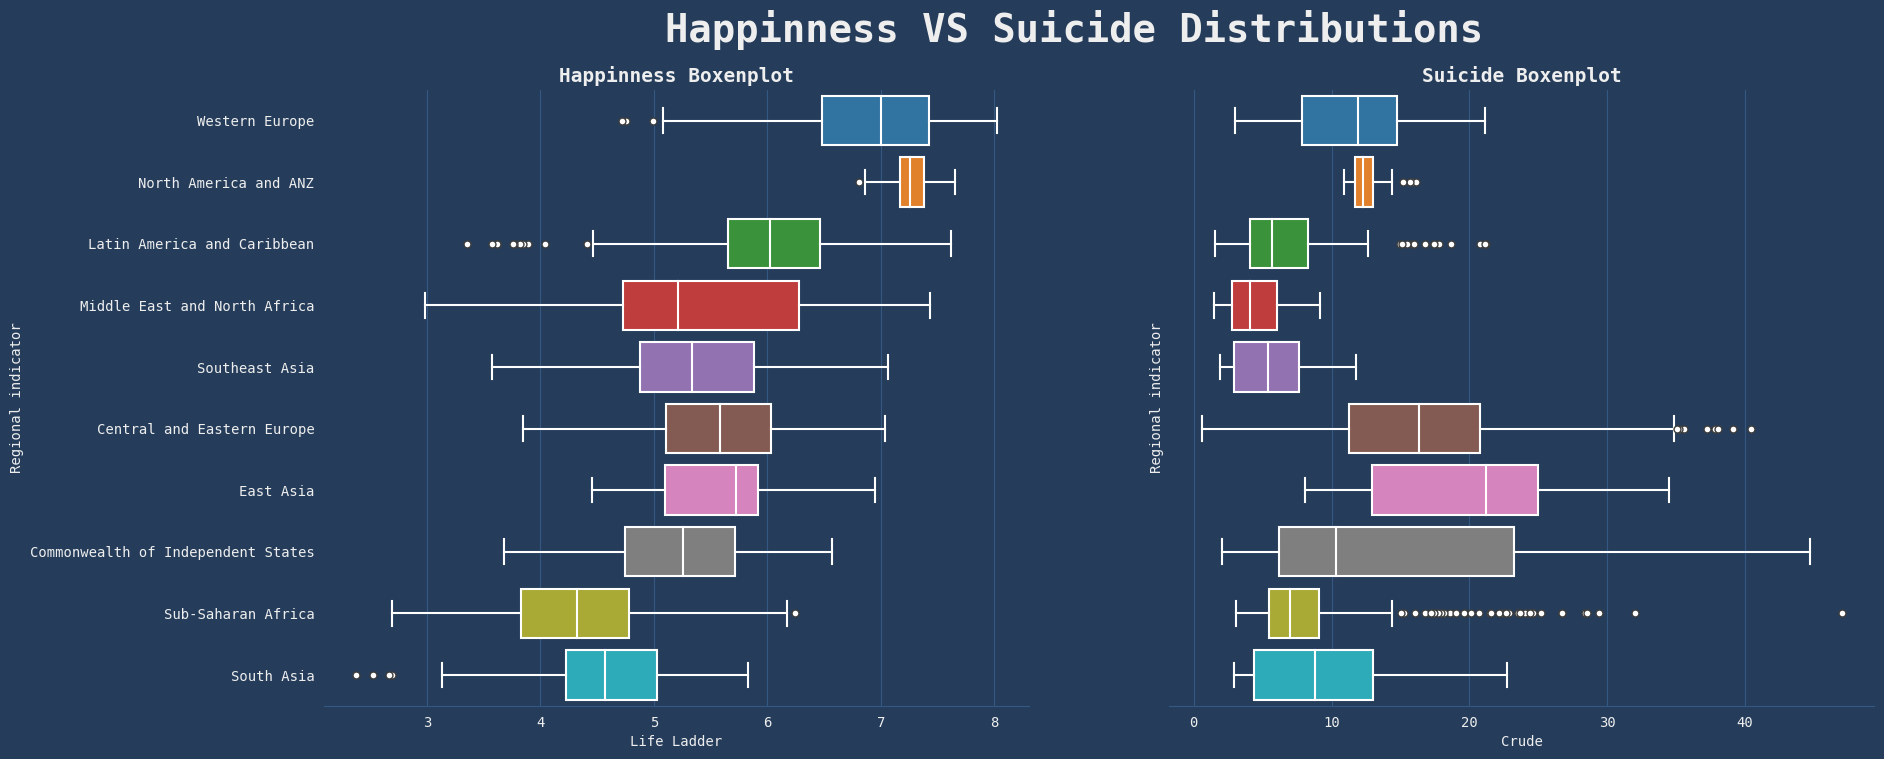

In [22]:
fig, axes = plt.subplots(1, 2,sharey= True ,figsize=(20,8))
fig.suptitle('Happinness VS Suicide Distributions\n',fontsize = 28,fontweight = 'bold')


sns.boxplot(y="Regional indicator",x="Life Ladder",data=df_merged.sort_values('Life Ladder',ascending=False),ax= axes[0],**PROPS)
axes[0].set_title('Happinness Boxenplot',fontsize = 14,fontweight = 'bold')

sns.boxplot(y="Regional indicator",x="Crude",data=df_WHR_sui_merg[df_WHR_sui_merg['Crude']<50].sort_values('Life Ladder',ascending=False),ax= axes[1] ,**PROPS)
axes[1].set_title('Suicide Boxenplot',fontsize = 14,fontweight = 'bold')

fig.savefig("4_Extracted_Figures/Life_Ladder_Suicide_Crude_by_Regions", dpi=200)
plt.show()

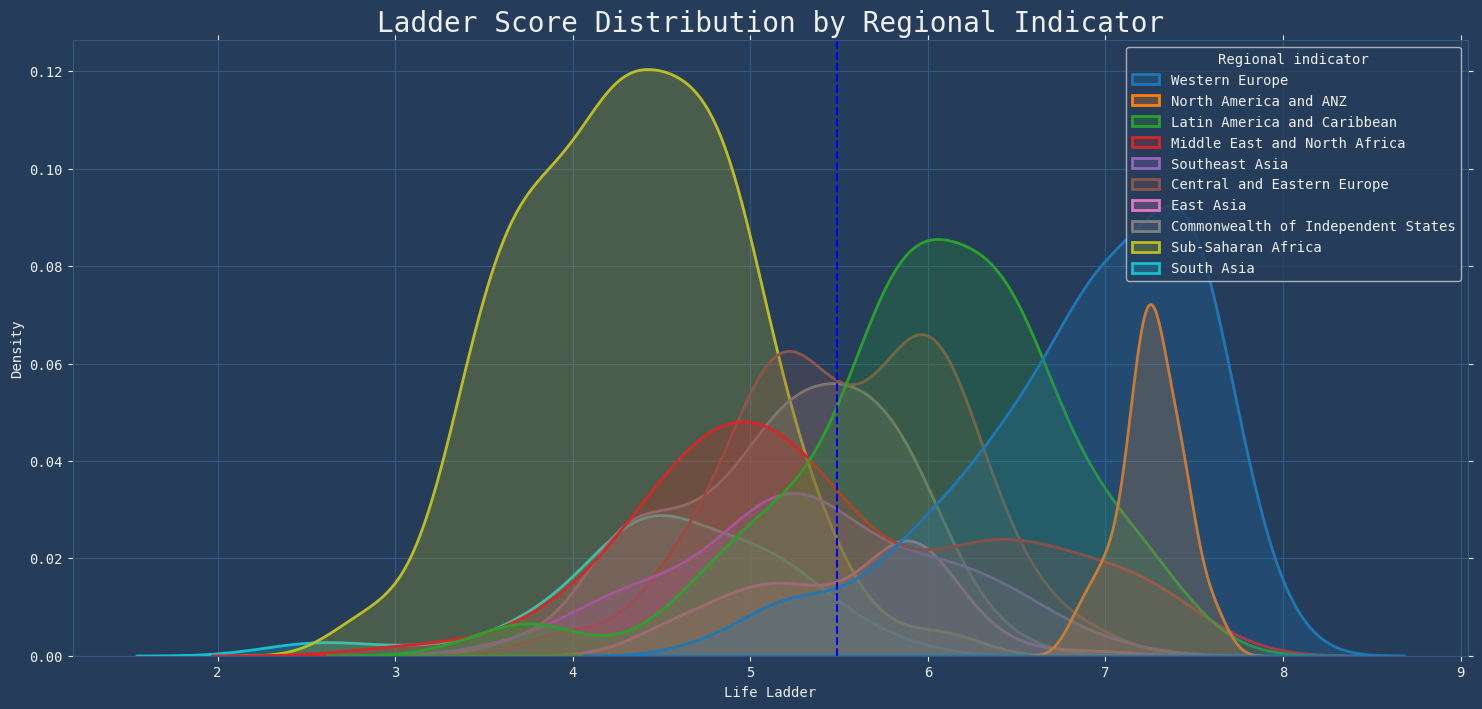

In [237]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df_merged.sort_values('Life Ladder',ascending=False), x="Life Ladder", hue="Regional indicator", fill=True, linewidth=2)
plt.axvline(df_merged["Life Ladder"].mean(), linestyle="--", color="blue", label="Ladder Mean")
plt.title("Ladder Score Distribution by Regional Indicator",fontsize = 20)
plt.savefig("4_Extracted_Figures/Life_Ladder_Over_All_by_Regions", dpi=200)
plt.show()

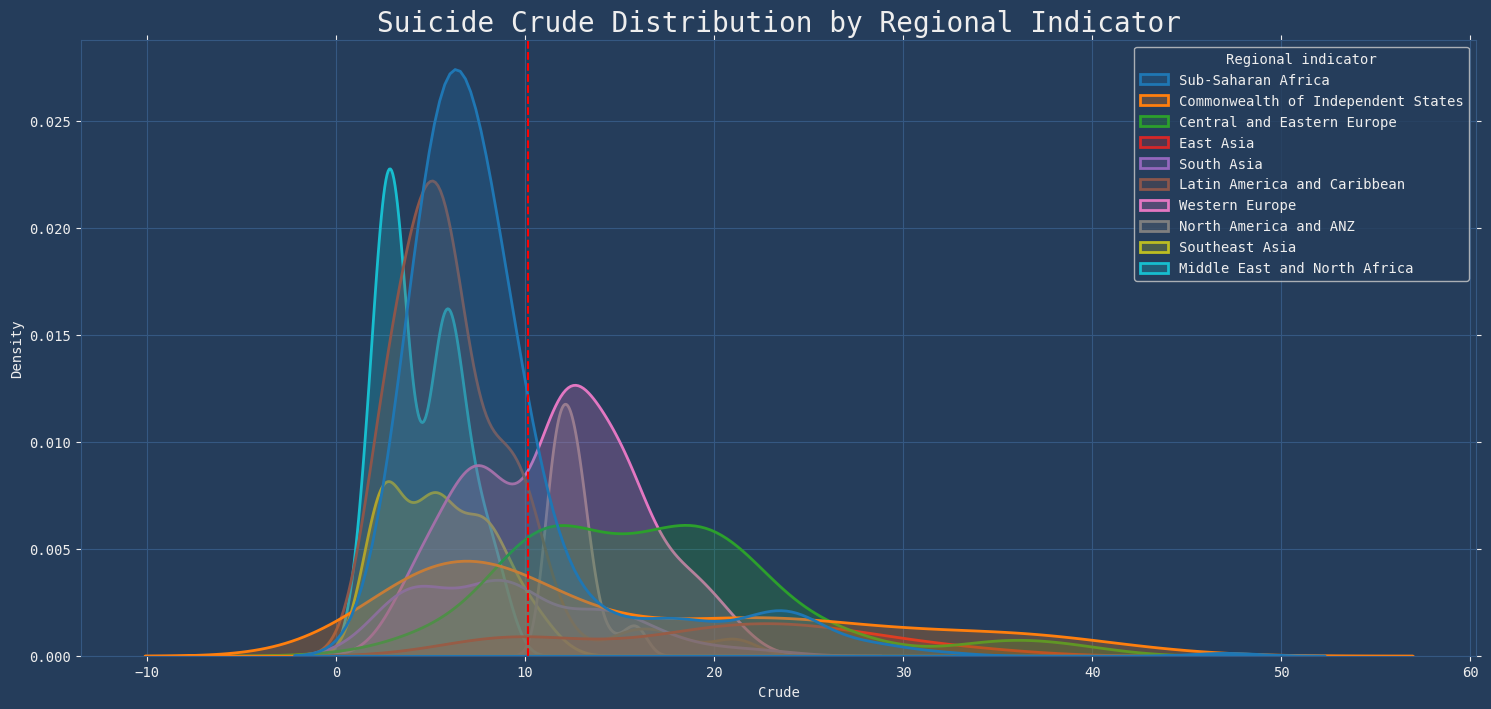

In [236]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df_WHR_sui_merg[df_WHR_sui_merg['Crude']<50].sort_values('Crude',ascending=False), x="Crude", hue="Regional indicator", fill=True, linewidth=2)
plt.axvline(df_WHR_sui_merg[df_WHR_sui_merg['Crude']<50]['Crude'].mean(), linestyle="--", color="red", label="Crude Mean")
plt.title("Suicide Crude Distribution by Regional Indicator",fontsize = 20)
plt.savefig("4_Extracted_Figures/Suicide_Crude_Over_All_by_Regions", dpi=200)
plt.show()

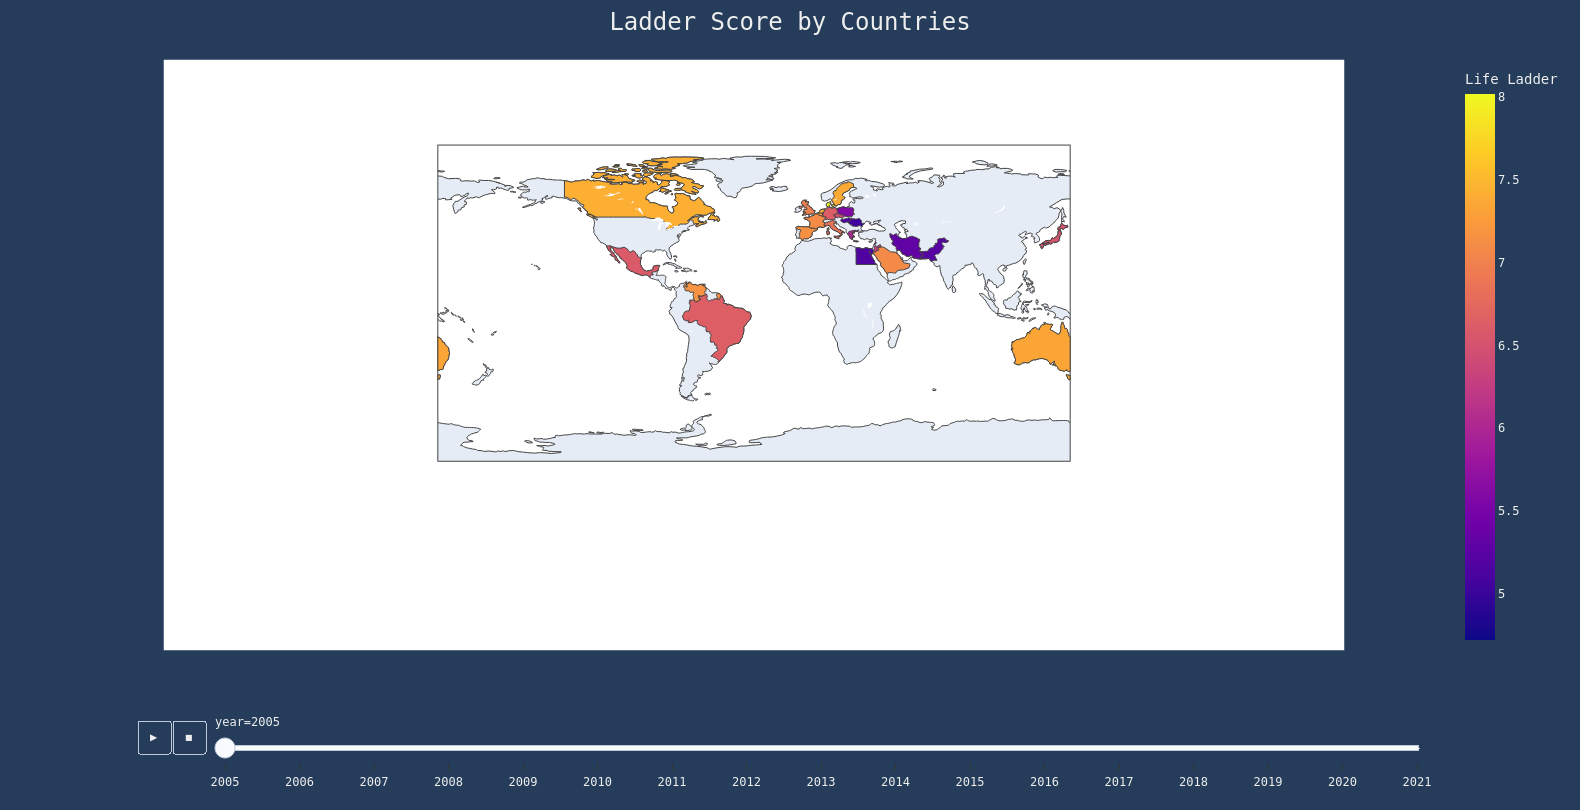

In [311]:
fig = px.choropleth(df_merged.sort_values("year"),
                   locations="Country name",
                   color="Life Ladder",
                   locationmode="country names",
                   animation_frame="year",
                   width=1440,height=810)

fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),
                  title={
    "text": "Ladder Score by Countries",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}
})

fig.show()

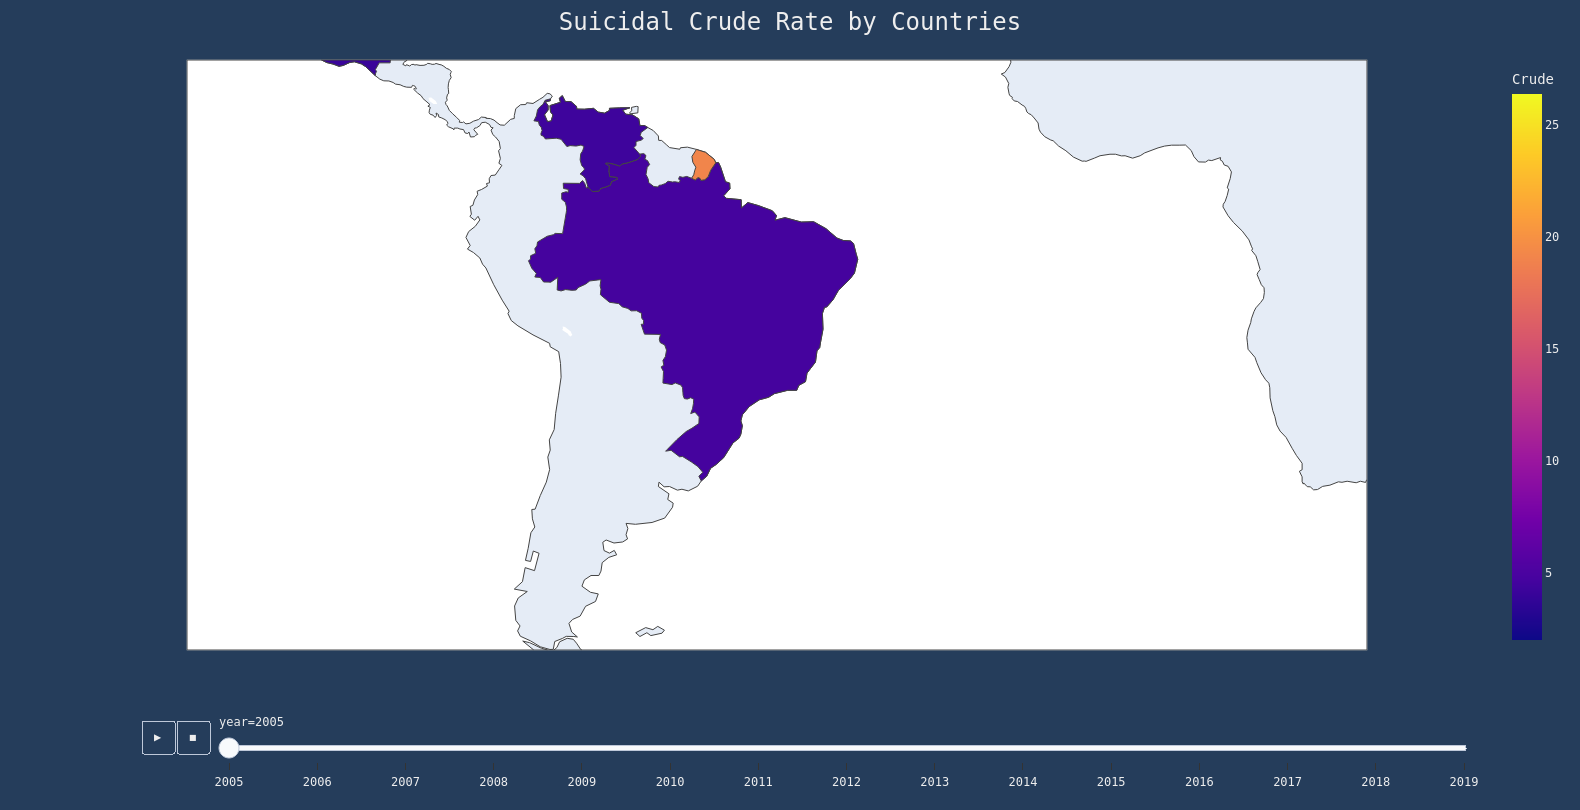

In [312]:
fig = px.choropleth(df_WHR_sui_merg.sort_values("year"),
                   locations="Country name",
                   color="Crude",
                   locationmode="country names",
                   animation_frame="year",
                   width=1440,height=810)

fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),
                  title={
    "text": "Suicidal Crude Rate by Countries",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}
})

fig.show()

In [216]:
df_merged.sort_values("year")["Log GDP per capita"].values.astype(int)

array([10, 10,  9, ...,  6,  7,  7])

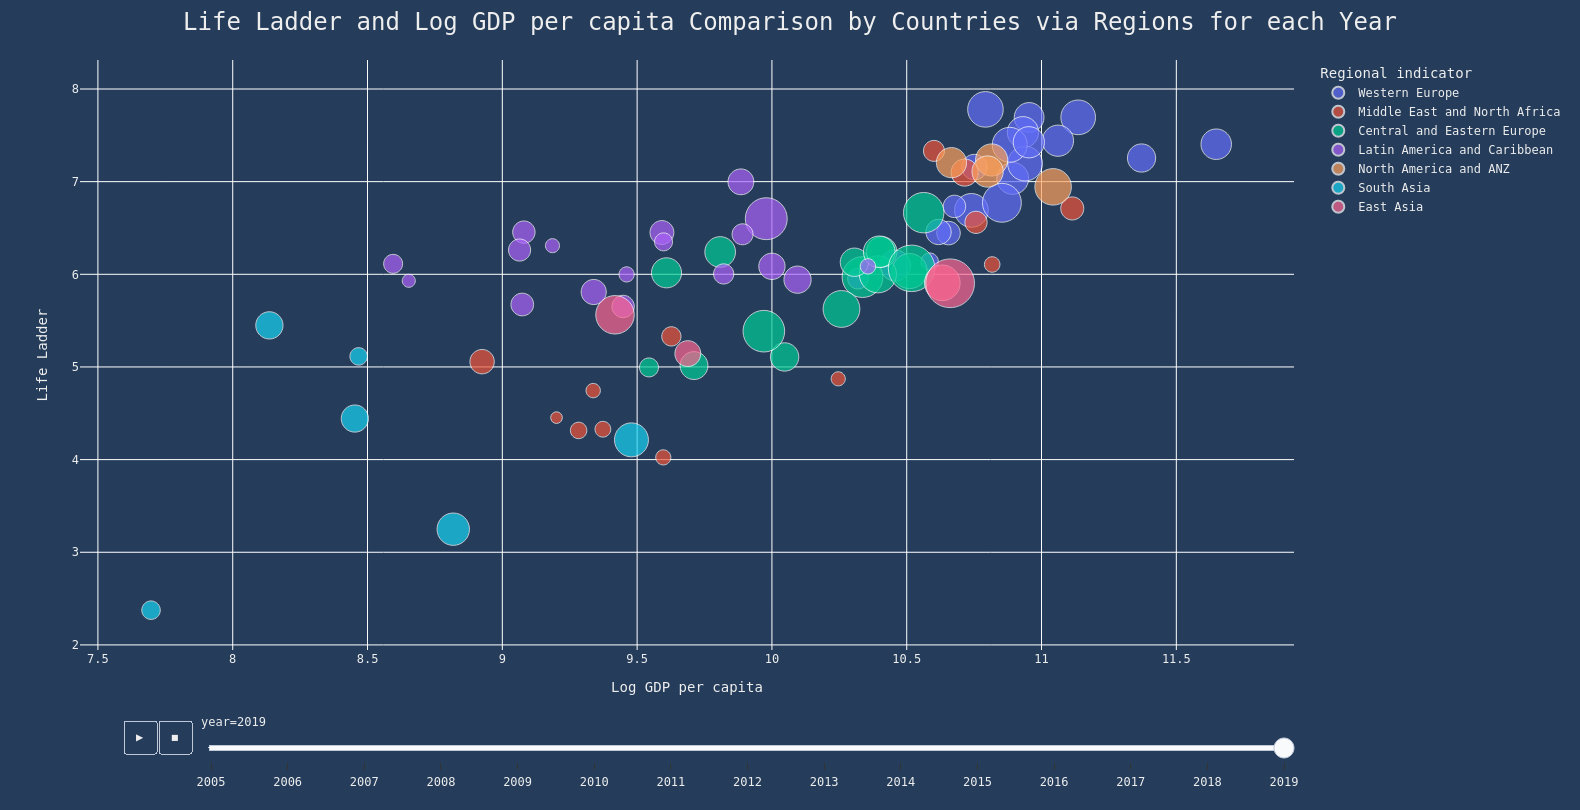

In [313]:
fig = px.scatter(df_WHR_sui_merg.sort_values("year"),
                x="Log GDP per capita",
                y="Life Ladder",
                animation_frame="year",
                animation_group="Country name",
                color="Regional indicator",
                hover_name="Country name",
                size_max=60,
                size="Crude",
                width=1440,height=810)

fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),
                  
                  title={
    "text": "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}
})


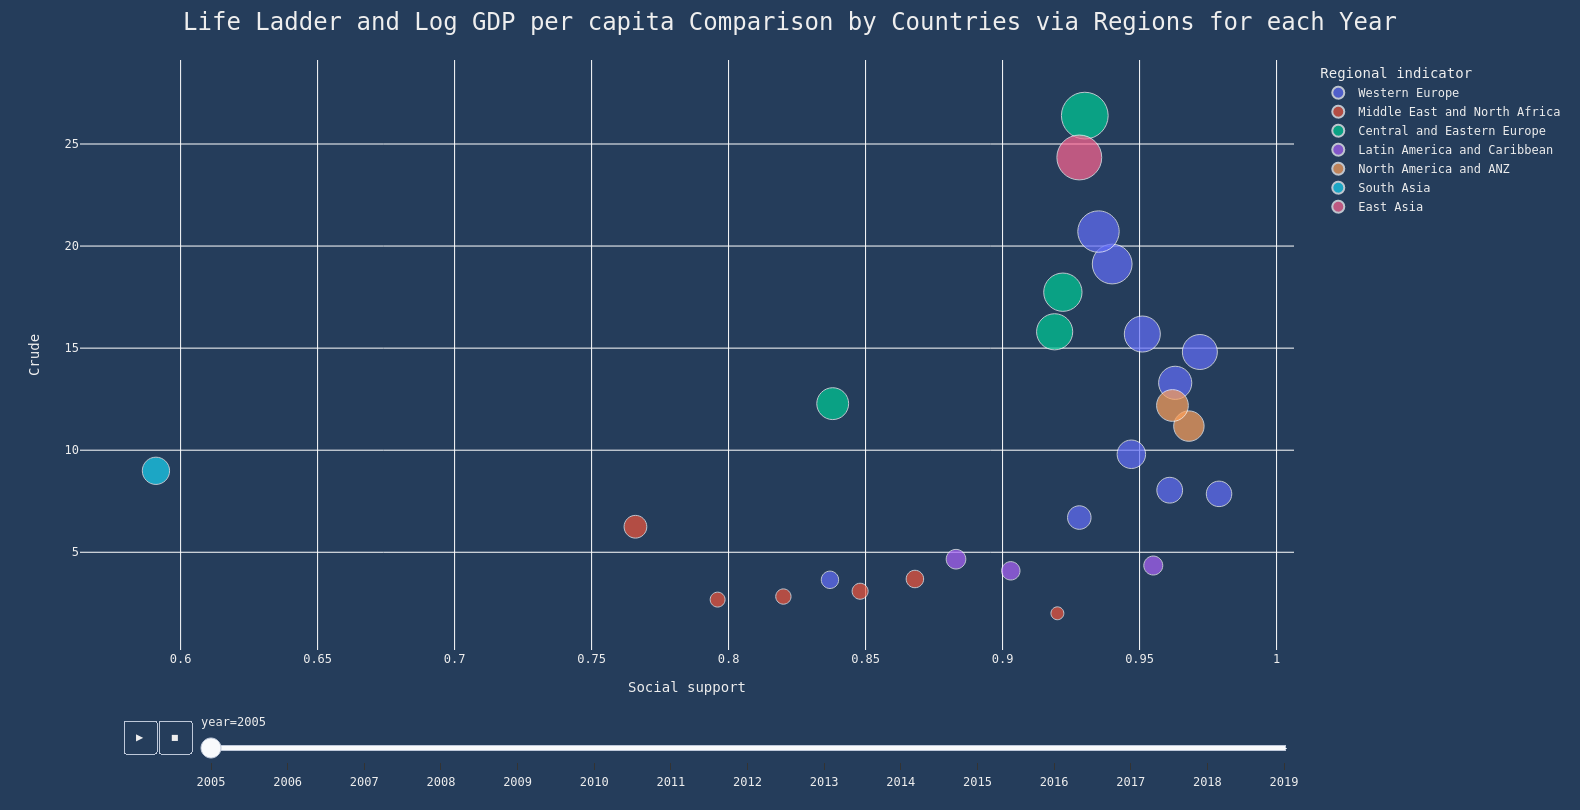

In [155]:
fig = px.scatter(df_WHR_sui_merg.sort_values("year"),
                x="Social support",
                y="Crude",
                animation_frame="year",
                animation_group="Country name",
                color="Regional indicator",
                hover_name="Country name",
                size_max=60,
                size="Crude",
                width=1440,height=810)

fig.update_layout(plot_bgcolor = background_color,paper_bgcolor= background_color,font = dict(
            color='#EEEEEE', family= "monospace"
        ),title={
    "text": "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 24, "color": "#EEEEEE", "family": "monospace"}
})


In [12]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "axes.labelcolor": text_color,

        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,

        "grid.color": grid_color,

        "font.family": font_family,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": True,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

FEMALE_COLOR = "#F64740"
MALE_COLOR = "#05B2DC"
background_color="#253D5B"

set_seaborn_style(
    font_family="monospace",
    background_color="#253D5B",
    grid_color="#355882",
    text_color="#EEEEEE"
)
population_male = df_sui_merg[df_sui_merg['Gender']=='Male'].sort_values('Crude Rate',ascending=True)
population_female = df_sui_merg[df_sui_merg['Gender']=='Female'].sort_values('Crude Rate',ascending=True)

## Suicide Dataset

In [33]:
def create_x_labels(ax):
    return ["{}".format(round(abs(x))) for x in ax.get_xticks()[1:-1]]

def format_ticks(ax, xlim=(None, None),ylim=(None, None)):
    ax.tick_params(axis="x", labelsize=12, pad=8)
    ax.tick_params(axis="y", labelsize=12)
    ax.set(ylabel=None, xlabel=None, xlim=xlim,ylim = ylim)
    
    plt.xticks(
        ticks=ax.get_xticks()[1:-1],
        labels=create_x_labels(ax)
    )

def add_legend(x, y): 
    patches = [
        mpatches.Patch(color=MALE_COLOR, label="Male"),
        mpatches.Patch(color=FEMALE_COLOR, label="Female")
    ]
    
    leg = plt.legend(
        handles=patches,
        bbox_to_anchor=(x, y), loc='center',
        ncol=2, fontsize=15,
        handlelength=1, handleheight=0.4,
        edgecolor=background_color
    )
    
def create_image_from_figure(fig):
    plt.tight_layout()
    
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    plt.close() 
    
    return Image.fromarray(data) 

def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    image = Image.new("RGB", (size[0] + left + right, size[1] + top + bottom), background)
    image.paste(chart, (left, top))
    return image

### Male VS female Suicidal Distribution GIF

In [13]:
def create_Suicide_Country_distribution(female_df, male_df, year):

    ax = sns.barplot(y=male_df["Regional indicator"], x=male_df[male_df['year']== int(year)]['Crude Rate'] * -1, orient="h", color=MALE_COLOR)
    ax = sns.barplot(y=female_df["Regional indicator"], x=female_df[female_df['year']==  int(year)]['Crude Rate'], orient="h", color=FEMALE_COLOR)
    
    return ax

In [74]:
images = []
years = list(sorted(population_male.year.unique()))

for year in years:
    fig = plt.figure(figsize=(12, 8))
    ax = create_Suicide_Country_distribution(
    female_df=population_female,
    male_df=population_male,
    year=year
    
    )
    format_ticks(ax)
    add_legend(x=0.25, y=1.09)
    format_ticks(ax, xlim=(-40, 20))
    plt.title("Suicide Distribution for the World in  ",x=.25, y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 25, 5, background_color)
    images.append(image)

In [75]:
images = images + [images[-1] for _ in range(20)]
imageio.mimwrite('4_Extracted_Figures/Suicide Distribution for the World in time-lapse.gif', images, duration=0.005)

### Suicide Crude by Regional Indicator GIF

In [24]:
def create_Suicide_distribution(df, year):

    ax = sns.kdeplot(data=df[df['year']==year ].sort_values('Crude',ascending=False), x="Crude", hue="Regional indicator",
                     fill=True, linewidth=2,palette='rainbow',warn_singular=False)
    ax.axvline(df[df['year']==year ]['Crude'].mean(), linestyle="--", color="red", label="Crude Mean")
    return ax

In [72]:
images = []
years = list(sorted(df_WHR_sui_merg.year.unique()))

for year in years:


    fig = plt.figure(figsize=(12, 8))

    ax = create_Suicide_distribution(df_WHR_sui_merg,year)
    format_ticks(ax, xlim=(-30, 100),ylim=(0.000,0.025))
    plt.title("Suicide Crude by Regional Indicator in  ",x=0.40, y=1.14, fontsize=21)
    plt.text(x=0.725, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)
    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 25, 5, background_color)
    images.append(image)


In [73]:
images = images + [images[-1] for _ in range(20)]
imageio.mimwrite('4_Extracted_Figures/Suicide Distribution for Regions in time-lapse.gif', images, duration=0.005)

### Life Ladder by Regional Indicator GIF

In [63]:
def create_Happinness_distribution(df, year):

    ax = sns.kdeplot(data=df[df['year']==year ].sort_values('Life Ladder',ascending=False), x="Life Ladder", hue="Regional indicator",
                     fill=True, linewidth=2,palette='rainbow',warn_singular=False)
    ax.axvline(df[df['year']==year ]['Life Ladder'].mean(), linestyle="--", color="red", label="Ladder Mean")
    return ax

In [70]:
images = []
years = list(sorted(df_merged.year.unique()))

for year in years:


    fig = plt.figure(figsize=(12, 8))

    ax = create_Happinness_distribution(df_merged,year)
    format_ticks(ax, xlim=(1, 9),ylim=(0.00,0.15))

    plt.title("Life Ladder by Regional Indicator in  ",x=0.40, y=1.14, fontsize=21)
    plt.text(x=0.70, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)
    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 25, 5, background_color)
    images.append(image)


In [71]:
images = images + [images[-1] for _ in range(20)]
imageio.mimwrite('4_Extracted_Figures/Life Ladder by Regional Indicator time-lapse.gif', images, duration=0.001)

## Comparing top 10 and bottom countirees features in suuicide and Happinness and Features

In [21]:
list_features = ['Social support',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption',
                 'Log GDP per capita',
                 'Healthy life expectancy at birth',
                 ]

In [22]:
def create_grid(figures, pad, nrows):
    ncols = int(len(figures) / nrows)
    size = figures[0].size

    image = Image.new(
        "RGBA",
        (ncols * size[0] + (ncols - 1) * pad, nrows * size[1] + (nrows - 1) * pad),
        "#ffffff00"
    )

    for i, figure in enumerate(figures):
        col, row = i % ncols, i // ncols
        image.paste(figure, (col * (size[0] + pad), row * (size[1] + pad)))

    return image

def top_10(feature,year):
    
    
    fig,ax = plt.subplots(1,4,figsize = (35,7))
    if feature == 'Log GDP per capita':
        fig.suptitle('\nHappinness VS Suicide Distributions for Features in {}\n'.format(year),fontsize = 36,fontweight = 'bold')

    #top10 Happinness
    sns.barplot(ax=ax[0],data = df_WHR_sui_merg[df_WHR_sui_merg['year']==year].sort_values('Life Ladder',ascending=False)[:10],
                x = 'Country name', y = feature,palette='cool')
    ax[0].set_title('\n Analysis of the Top 10 Countries Happiness \n',fontsize = 15,fontweight = 'bold')
    ax[0].xaxis.set_ticks_position('both')
    ax[0].yaxis.set_ticks_position('both')
    ax[0].tick_params(axis='x',labelsize=10,rotation = 20)
    
    
    #bottom10 Happinness
    sns.barplot(ax=ax[1],data = df_WHR_sui_merg[df_WHR_sui_merg['year']==year].sort_values('Life Ladder',ascending=True)[:10],
                x = 'Country name', y = feature,palette='flare_r')
    ax[1].set_title('\n Analysis of the Bottom 10 Countries Happiness \n',fontsize = 15,fontweight = 'bold')
    ax[1].xaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[1].tick_params(axis='x',labelsize=10,rotation = 20)
    
    
    #top10 Suicide
    sns.barplot(ax=ax[2],data = df_WHR_sui_merg[df_WHR_sui_merg['year']==year].sort_values('Crude',ascending=False)[:10],
                x = 'Country name', y = feature,palette='YlOrBr')
    ax[2].set_title('\n Analysis of the Top 10 Countries Suicide \n',fontsize = 15,fontweight = 'bold')
    ax[2].xaxis.set_ticks_position('both')
    ax[2].yaxis.set_ticks_position('both')
    ax[2].tick_params(axis='x',labelsize=10,rotation = 20)
    
    
    #bottom10 Suicide
    sns.barplot(ax=ax[3],data = df_WHR_sui_merg[df_WHR_sui_merg['year']==year].sort_values('Crude',ascending=True)[:10],
                x = 'Country name', y = feature,palette='Blues')
    ax[3].set_title('\n Analysis of the Bottom 10 Countries Suicide \n',fontsize = 15,fontweight = 'bold')
    ax[3].xaxis.set_ticks_position('both')
    ax[3].yaxis.set_ticks_position('both')
    ax[3].tick_params(axis='x',labelsize=10,rotation = 20)    
    
    return fig, ax


In [23]:
list_features= ['Log GDP per capita',
                'Social support',
                'Healthy life expectancy at birth',
                'Freedom to make life choices', 'Generosity',
                'Perceptions of corruption',]

In [27]:
figures = []
grids=[]

for year in years[:-2]:
    for feature in list_features:

        fig,ax = top_10(feature,year)

        image = create_image_from_figure(fig)
        image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
        figures.append(image)

    grid = create_grid(figures, pad=0, nrows=6)
    figures=[]
    image = add_padding_to_chart(grid, 20, 20, 25, 5, background_color)
    image.save('4_Extracted_Figures/Ladder vs Suicide Distribution For years/Ladder VS Suicide Distributions for Features in {}.png'.format(year))

In [25]:
imageio.mimwrite('4_Extracted_Figures/Ladder VS Suicide Distributions for Features  time-lapse.gif', grids, duration=1)

## Relationship Between Features

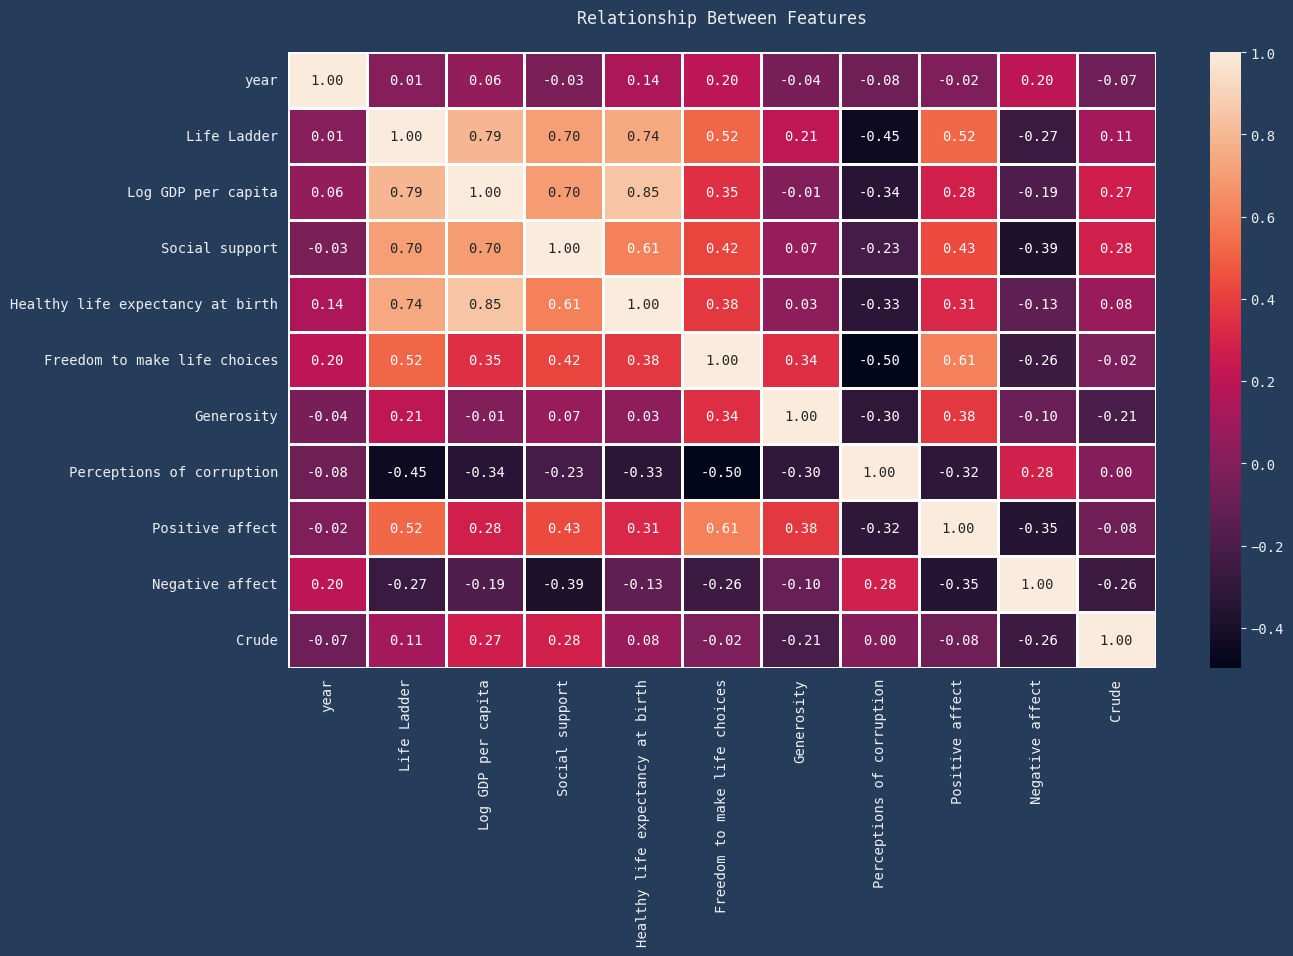

In [317]:
plt.figure(figsize=(14,8))
sns.heatmap(df_WHR_sui_merg.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=2)
plt.title("Relationship Between Features\n")
plt.savefig("4_Extracted_Figures/Relationship Between Features", dpi=200)
plt.show()

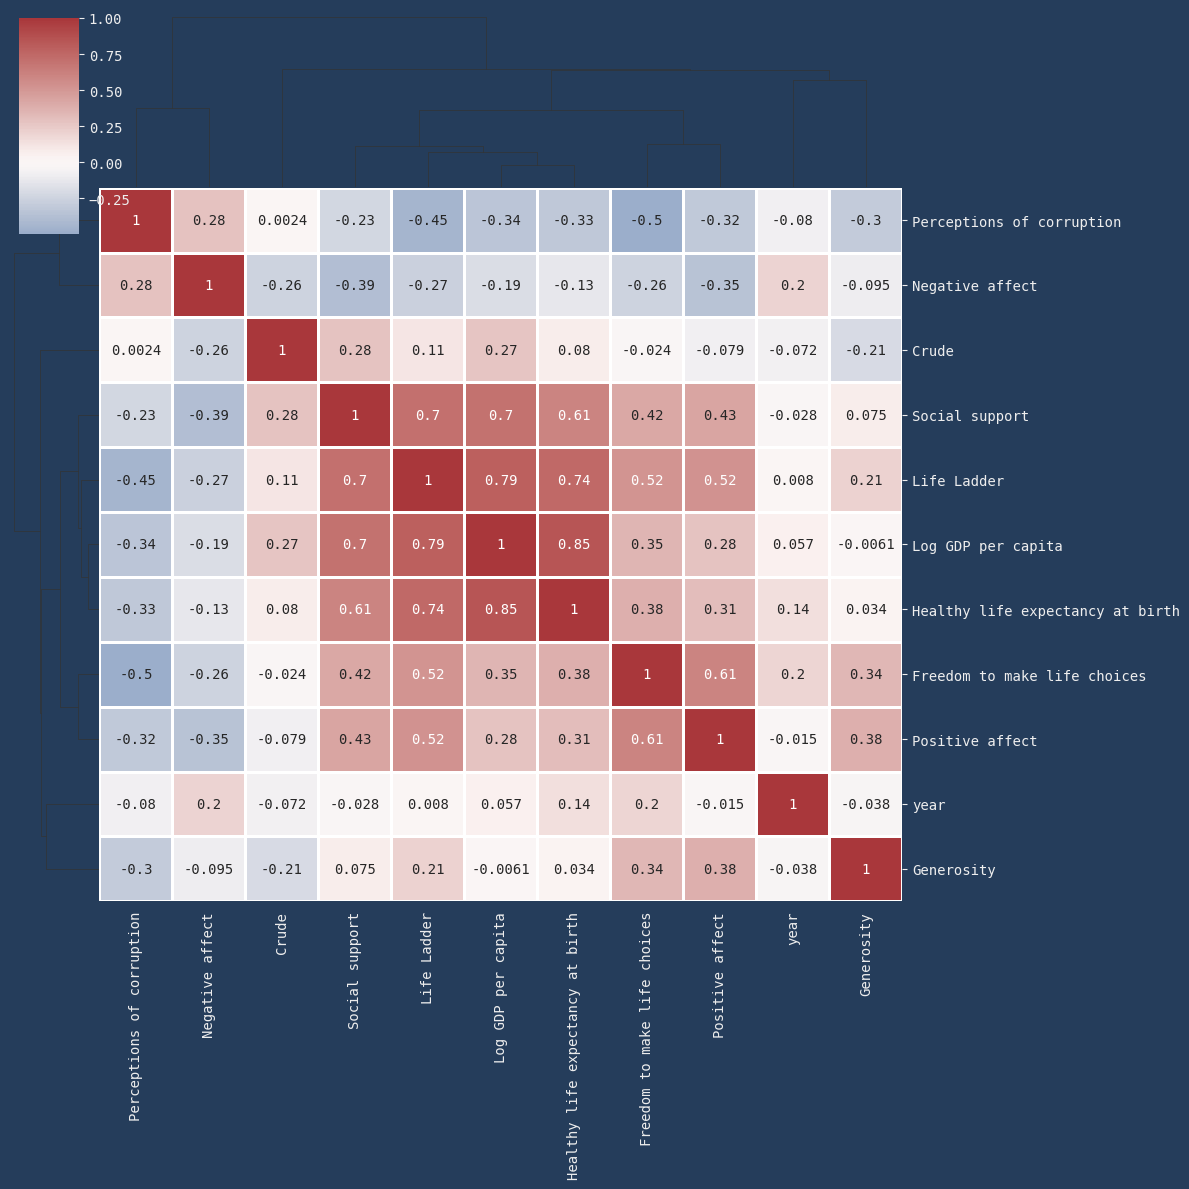

In [316]:
sns.clustermap(df_WHR_sui_merg.corr(numeric_only=True),
               center = 0,
               cmap = "vlag",
               dendrogram_ratio = (0.1, 0.2),
               annot = True,
               linewidths = 2,
               figsize = (12, 12))
plt.show()